Problem Statement:
- Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

- Key attributes of the database
- The database includes the following indicators:

- `country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
- `country_long` (text): longer form of the country designation
- `name` (text): name or title of the power plant, generally in Romanized form
- `gppd_idnr` (text): 10 or 12 character identifier for the power plant
- `capacity_mw` (number): electrical generating capacity in megawatts
- `latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- `longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- `primary_fuel` (text): energy source used in primary electricity generation or export
- `other_fuel1` (text): energy source used in electricity generation or export
- `other_fuel2` (text): energy source used in electricity generation or export
- `other_fuel3` (text): energy source used in electricity generation or export
-  `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
- `owner` (text): majority shareholder of the power plant, generally in Romanized form
- `source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
- `url` (text): web document corresponding to the `source` field
- `geolocation_source` (text): attribution for geolocation information
- `wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
- `year_of_capacity_data` (number): year the capacity information was reported
- `generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
- `generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
- `generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
- `generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
- `generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
- `generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
- `generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
- `generation_data_source` (text): attribution for the reported generation information
- `estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
- `estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
- `estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
- `estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
- `estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
- 'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
- `estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
- `estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
- `estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
- `estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 

- Fuel Type Aggregation: We define the "Fuel Type" attribute of our database based on common fuel categories. 

- Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw

In [323]:
#importing numpy and pandas library
import numpy as np
import pandas as pd

#importing visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#importing warnings
import warnings
warnings.filterwarnings('ignore')


In [324]:
#uploading the dataset into pandas library

data=pd.read_csv('database_IND.txt')

In [325]:
#printing the dataset

data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [326]:
data.shape

(907, 27)

The dataset contains 907 rows and 27 columns.

In [327]:
#columns present in dataset
data.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [328]:
#checking for null values in dataset

data.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

It can be seen that most of the columns has null values in it. Hence I need to treat those null values by either imputing them with some data or deleting the columns if the null values are >75%.

In [329]:
# Dropping columns that are completely empty or almost empty

data.drop(data[['other_fuel2','other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh']],axis=1,inplace=True)

In [330]:
data.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'owner', 'source', 'url', 'geolocation_source',
       'year_of_capacity_data', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_data_source'],
      dtype='object')

In [331]:
data['country'].value_counts()

IND    907
Name: country, dtype: int64

- All the values present in this column contains same values, hence this column can be dropped.

In [332]:
data['country_long'].value_counts()

India    907
Name: country_long, dtype: int64

- The whole column contains same value, hence this column will be dropped.

In [333]:
data['name'].value_counts()

ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64

- These are names of power plants and each power plant has different name, hence this column is not usable for model building, hence this column will be dropped.

In [334]:
data['gppd_idnr'].value_counts()

WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64

- This column comprises of unique ID's provided to each power plant, hence this data also not usable for model building, hence this will be dropped.

In [335]:
data['capacity_mw'].value_counts()

5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64

- This data comprises of continuous values which represents power generated by different power plants.

In [336]:
data['latitude'].value_counts()

19.0004    3
24.1917    3
24.8747    2
13.2450    2
11.5336    2
          ..
22.7554    1
27.1598    1
17.2970    1
20.8772    1
9.9344     1
Name: latitude, Length: 836, dtype: int64

- This column shows the latitude of the power plant, which helps in pinpointing power plant location. 

In [337]:
data['longitude'].value_counts()

71.6917    4
75.8988    3
71.6918    3
72.8983    3
81.2875    3
          ..
70.3961    1
74.2393    1
77.0435    1
73.8254    1
77.4768    1
Name: longitude, Length: 827, dtype: int64

- This column shows the longitude of the power plant, which helps in pinpointing power plant location. 

In [338]:
data['primary_fuel'].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

This column shows data of what kind of fuels that are used in generating power in plants.

In [339]:
data['other_fuel1'].value_counts()

Oil             195
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

- This column shows the data pf secondly fuel used in generating power in plants.

In [340]:
data['commissioning_year'].value_counts()

2015.0    28
2013.0    25
2012.0    23
2016.0    19
2010.0    18
          ..
1946.0     1
1956.0     1
1937.0     1
1949.0     1
1953.0     1
Name: commissioning_year, Length: 73, dtype: int64

In [341]:
data['commissioning_year'].max()

2018.0

- This column shows the years when the power plants were commissioned to generate power.

In [342]:
data['owner'].value_counts()

Acc Acc ltd                                                    4
Sterling Agro Industries ltd.                                  4
Jk Cement ltd                                                  4
SWPPL                                                          3
Jaypee Ltd jccl)                                               3
                                                              ..
Sunkon Energy Private Limited                                  1
West Bengal Energy Development Corporation Limited (WBEDCL)    1
Energy Infratech Private Limited                               1
K. N. Ram                                                      1
iEnergy Wind Farms                                             1
Name: owner, Length: 280, dtype: int64

- This column represents names of companies that own the power plants. **According to me the names of companies is not important to create a model that will be based on primary fuel and capacity of plant in mega watts.**

In [343]:
data['source'].value_counts()

Central Electricity Authority                                  519
CDM                                                            124
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
                                                              ... 
Harsha Engineers Limited                                         1
Godawari Energy ltd                                              1
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Yashwantrao Krishna ssk                                          1
Name: source, Length: 191, dtype: int64

- The columns represents list of entities/companies that report the data,This is a continuous column but is made of names of companies that generally report data regarding power plants. On other terms power plants are governed by this companies, their tariffs and everything, this companies/organization decides.

In [344]:
data['url'].value_counts()

http://www.cea.nic.in/                                                              519
http://www.lancosolar.com/pdfs/rajasthan-pv-project-details.pdf                       7
http://www.ntpc.co.in                                                                 6
http://viainfotech.biz/Biomass/theme5/document/green_market/REC-project-list.pdf      5
http://www.mahaurja.com/PDF/PG2_GridConnSPPCommissioned.pdf                           4
                                                                                   ... 
https://cdm.unfccc.int/Projects/DB/LRQA%20Ltd1346322352.66/view                       1
https://cdm.unfccc.int/Projects/DB/DNV-CUK1351166669.28/view                          1
http://harshaengineers.com                                                            1
http://hiragroup.com/companies/godawari-green-energy-limited/                         1
https://cdm.unfccc.int/Projects/DB/RWTUV1345031355.85/view                            1
Name: url, Length: 304, dtype: i

- This column has the URL's of the source mentioned companies, Url's does not play a role in model building hence this will be dropped.

In [345]:
data['geolocation_source'].value_counts()

WRI                                     765
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

- The data shows the names of the companies that does the R&D for power plants. 

In [346]:
data['year_of_capacity_data'].value_counts()

2019.0    519
Name: year_of_capacity_data, dtype: int64

- This data shows the year the capacity information was reported. It can be seen that for 519 plants the report was generated in 2019, and the latest commisioned plant was in 2018. 
- **Hence we can generalize that for all the power plants capacity information was reported in 2019. In that case we can drop this column as column with same values is not useful in model building.**

In [347]:
data['generation_gwh_2014'].value_counts()

0.000000       28
617.789264      1
359.139800      1
7368.390000     1
9983.018000     1
               ..
4436.700000     1
1154.342000     1
451.053400      1
3239.142900     1
3194.359820     1
Name: generation_gwh_2014, Length: 371, dtype: int64

In [348]:
data['generation_gwh_2015'].value_counts()

0.000000        27
843.747000       1
1497.798000      1
10422.690000     1
240.799900       1
                ..
6996.000000      1
14192.000000     1
219.377600       1
288.460450       1
0.994875         1
Name: generation_gwh_2015, Length: 396, dtype: int64

In [349]:
data['generation_gwh_2016'].value_counts()

0.000000       30
8470.570000     2
1511.000000     2
886.004428      1
90.644500       1
               ..
1338.095900     1
131.021600      1
6130.019928     1
5931.490000     1
233.596650      1
Name: generation_gwh_2016, Length: 403, dtype: int64

In [350]:
data['generation_gwh_2018'].value_counts()

0.000000        39
626.239128       1
505.420200       1
1098.450150      1
17.213500        1
                ..
220.551700       1
7321.267900      1
6532.350000      1
15305.220000     1
686.500000       1
Name: generation_gwh_2018, Length: 410, dtype: int64

- The above columns shows the power generated in gigawatt hours in years 2014,2015,2016 and 2018.

In [351]:
data['generation_data_source'].value_counts()

Central Electricity Authority    449
Name: generation_data_source, dtype: int64

- This column shows the company names that handles the data for various power plants.The Central Electricity Authority is a government body that handles and takes decisions on power plants.
- **Since all the plants are governed by same body then this column can be dropped as column with same data is not usable for model building.**

- **Dropping afore-mentioned columns that are not useful in model building. These columns are:** 
- country
- country_long
- name
- gppd_idnr
- owner
- source
- url
- year_of_capacity_data
- generation_data_source

In [352]:
#dropping columns

data.drop(data[['country','country_long','name','gppd_idnr','owner','source','url','year_of_capacity_data','generation_data_source']],axis=1,inplace=True)

In [353]:
data.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,NaN,2011.0,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,NaN,WRI,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,NaN,WRI,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,NaN,2004.0,WRI,617.789264,843.747,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,Oil,2015.0,WRI,3035.550000,5916.370,6243.000000,5385.579736,7279.000000


In [354]:
data.shape

(907, 12)

The dataset is now left with only 12 columns.
# Now filling NaN values in columns

In [355]:
data.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
commissioning_year     380
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

**Inputing the NaN columns with median**

In [356]:
data['latitude']=data['latitude'].fillna(data['latitude'].median())

data['longitude']=data['longitude'].fillna(data['longitude'].median())

data['commissioning_year']=data['commissioning_year'].fillna(data['commissioning_year'].median())

data['generation_gwh_2014']=data['generation_gwh_2014'].fillna(data['generation_gwh_2014'].median())

data['generation_gwh_2015']=data['generation_gwh_2015'].fillna(data['generation_gwh_2015'].median())

data['generation_gwh_2016']=data['generation_gwh_2016'].fillna(data['generation_gwh_2016'].median())

data['generation_gwh_2017']=data['generation_gwh_2017'].fillna(data['generation_gwh_2017'].median())

data['generation_gwh_2018']=data['generation_gwh_2018'].fillna(data['generation_gwh_2018'].median())

In [357]:
data['other_fuel1'].value_counts()

Oil             195
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

- Incase of 'other_fuel1' column it can be seen that there are 709 null values. By checking value count in same column it can be seen that of remaining 196 datapoints, 195 belongs to oil and 3 belongs to Gas and Cogeneration. 
- If I fill NaN values with mode of the column then it will fill all the 709 null values with oil only.
**Since I dont know anything about other fuels and also not much data is provided on this column, I will be dropping it as it will not be good to input false data which might build wrong model.** 
- There may be case in some datapoints where actual data could have been either Gas or Cogeneration, then inputting Oil in that case will create bad model, that will give false outputs.

# Dropping other_fuel1 column 

In [358]:
data.drop(['other_fuel1'],axis=1,inplace=True)

**Inputing the NaN values with mode in geolocation_source column**

In [359]:
data['geolocation_source']=data['geolocation_source'].fillna(data['geolocation_source'].mode()[0])

In [360]:
#checking data types of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             907 non-null    float64
 2   longitude            907 non-null    float64
 3   primary_fuel         907 non-null    object 
 4   commissioning_year   907 non-null    float64
 5   geolocation_source   907 non-null    object 
 6   generation_gwh_2014  907 non-null    float64
 7   generation_gwh_2015  907 non-null    float64
 8   generation_gwh_2016  907 non-null    float64
 9   generation_gwh_2017  907 non-null    float64
 10  generation_gwh_2018  907 non-null    float64
dtypes: float64(9), object(2)
memory usage: 78.1+ KB


# Checking for duplicate entries in dataset

In [361]:

data.duplicated().sum()

1

In [362]:
#removing duplicate entry


data.drop_duplicates(inplace=True)

- **Dataframe after removing null values,dropping columns and duplicates.** 

In [363]:
data.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,751.644375
1,98.0,24.7663,74.6090,Coal,2001.0,WRI,801.123775,711.181225,737.205450,817.977250,751.644375
2,39.2,21.9038,69.3732,Wind,2001.0,WRI,801.123775,711.181225,737.205450,817.977250,751.644375
3,135.0,23.8712,91.3602,Gas,2004.0,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,2015.0,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


In [364]:
# new shape of the dataset

data.shape

(906, 11)

In [365]:
#commissioning_ year column contains data in years so converting that into age of power plant since commissioning.

data['com_age']=2022-data['commissioning_year']

In [366]:
#printing power plant age column

data['com_age']

0      11.0
1      21.0
2      21.0
3      18.0
4       7.0
       ... 
902     6.0
903    21.0
904    21.0
905    21.0
906    21.0
Name: com_age, Length: 906, dtype: float64

**Dropping commissioning_year column**


In [367]:
data.drop(['commissioning_year'],axis=1,inplace=True)

In [368]:
data.head(2)

,capacity_mw,latitude,longitude,primary_fuel,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,com_age
0,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,801.123775,711.181225,737.20545,817.97725,751.644375,11.0
1,98.0,24.7663,74.6090,Coal,WRI,801.123775,711.181225,737.20545,817.97725,751.644375,21.0


# DATA VISUALIZATION

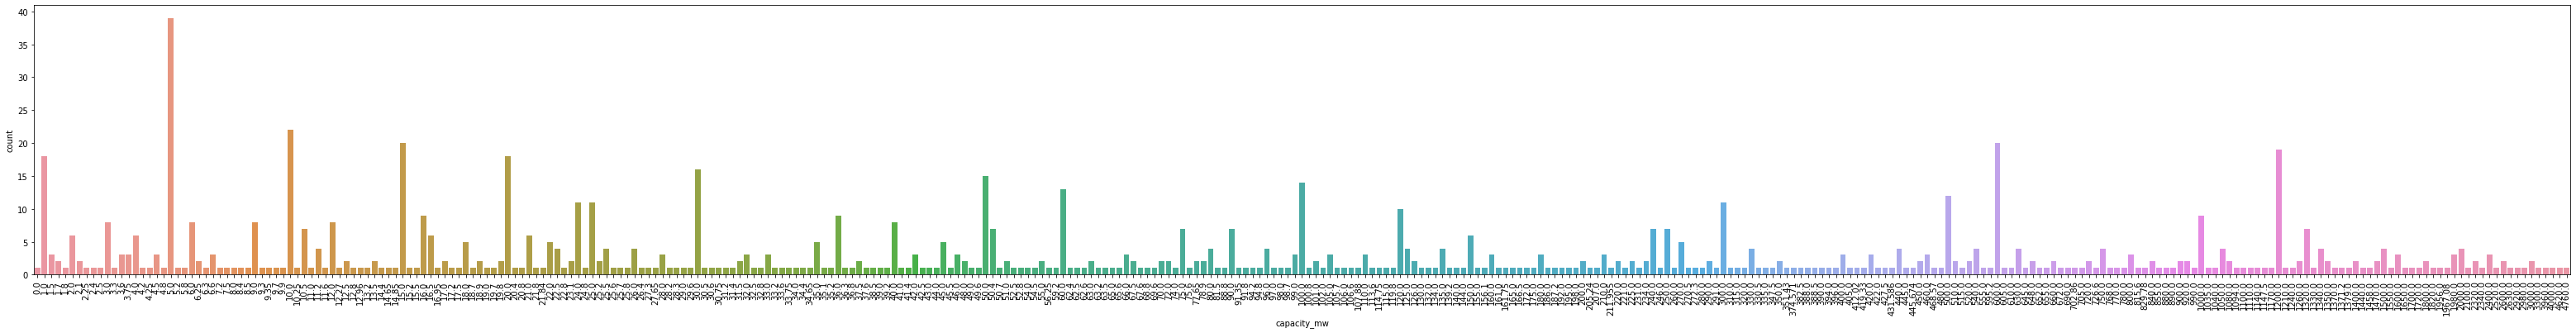

In [369]:
plt.figure(figsize=(55,6))
sns.countplot(data['capacity_mw'])
plt.xticks(rotation='vertical')
plt.show()

- As seen in plot there are >35 power plants that generate power of 5mW.
- Highest power generated by any plant is 4760mW.

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

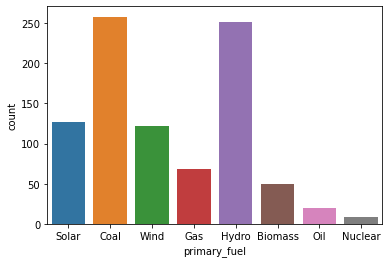

In [370]:
sns.countplot(data['primary_fuel'])

- The above plot shows that most commonly used primary fuel in power plants is Coal and Hydro. Nuclear is the least used primary fuel in power plants. It can also be said as there are less number of nuclear power plants in India.

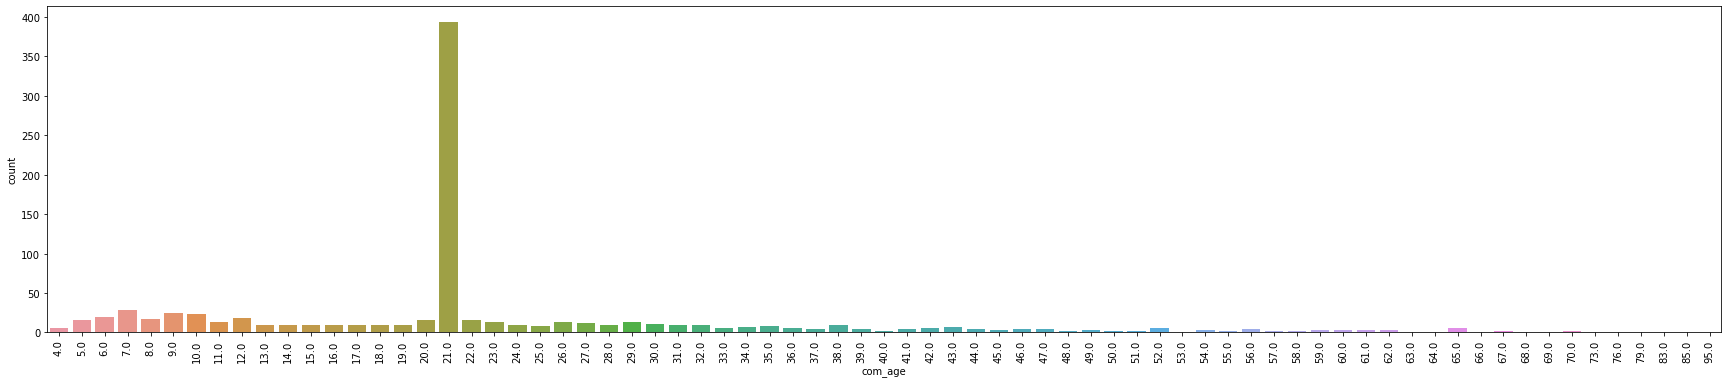

In [371]:
plt.figure(figsize=(30,6))
sns.countplot(data['com_age'])
plt.xticks(rotation='vertical')
plt.show()

The above plot shows that oldest power plant was commissioned 95 years ago and the latest was commissioned 4 years ago.

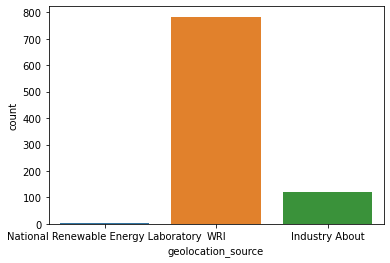

In [372]:

sns.countplot(data['geolocation_source'])
plt.show()

- WRI is the most common geolocation_source that attributes for geolocation information.

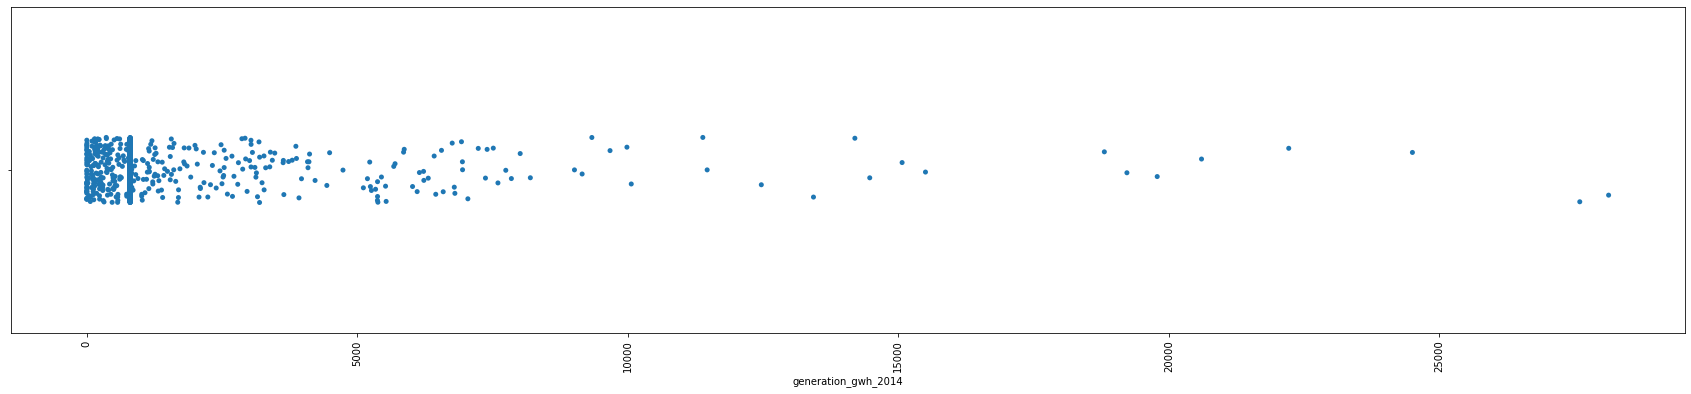

In [373]:
plt.figure(figsize=(30,6))
sns.stripplot(data['generation_gwh_2014'])
plt.xticks(rotation='vertical')
plt.show()

- **The above plot shows that in year 2014, most of the plants produces power in range of 0-1000 giga watts per hours**
- **There are 2 power plants which produces >25000 giga watts per hour.**

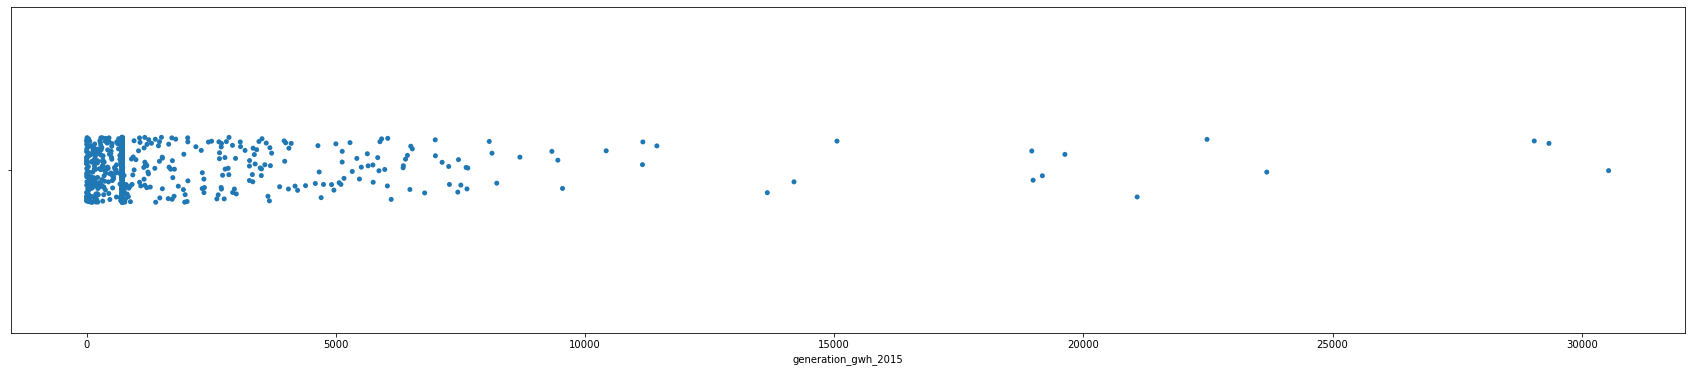

In [374]:
plt.figure(figsize=(30,6))
sns.stripplot(data['generation_gwh_2015'])
plt.show()

- The above plot shows that in year 2015, most of the plants produces power in range of 0-1000 giga watts per hours
- There are 3 power plants which produced >25000 giga watts per hour.

<Figure size 2160x2160 with 0 Axes>

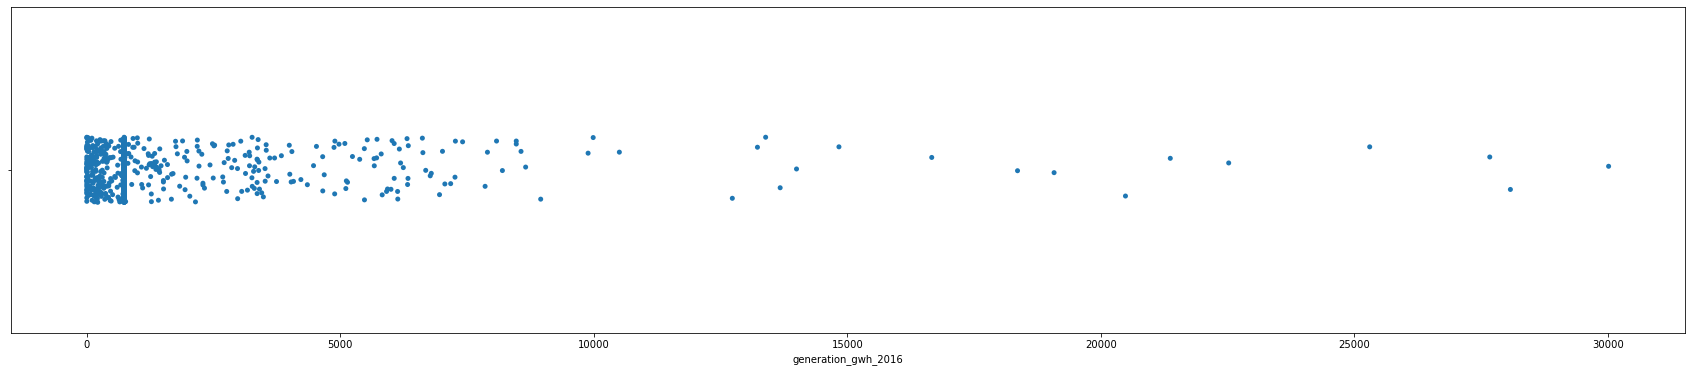

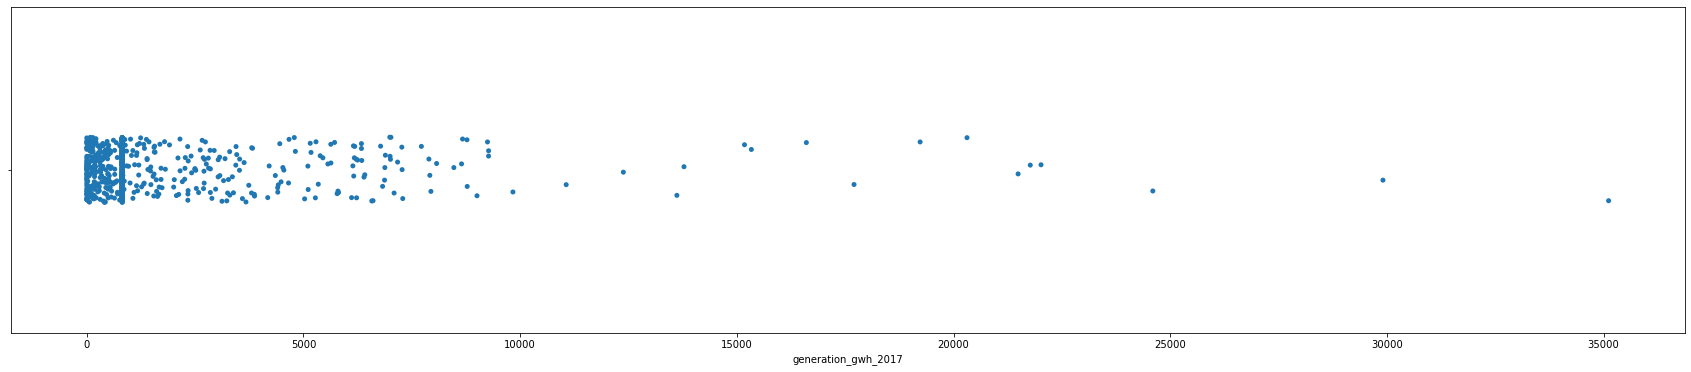

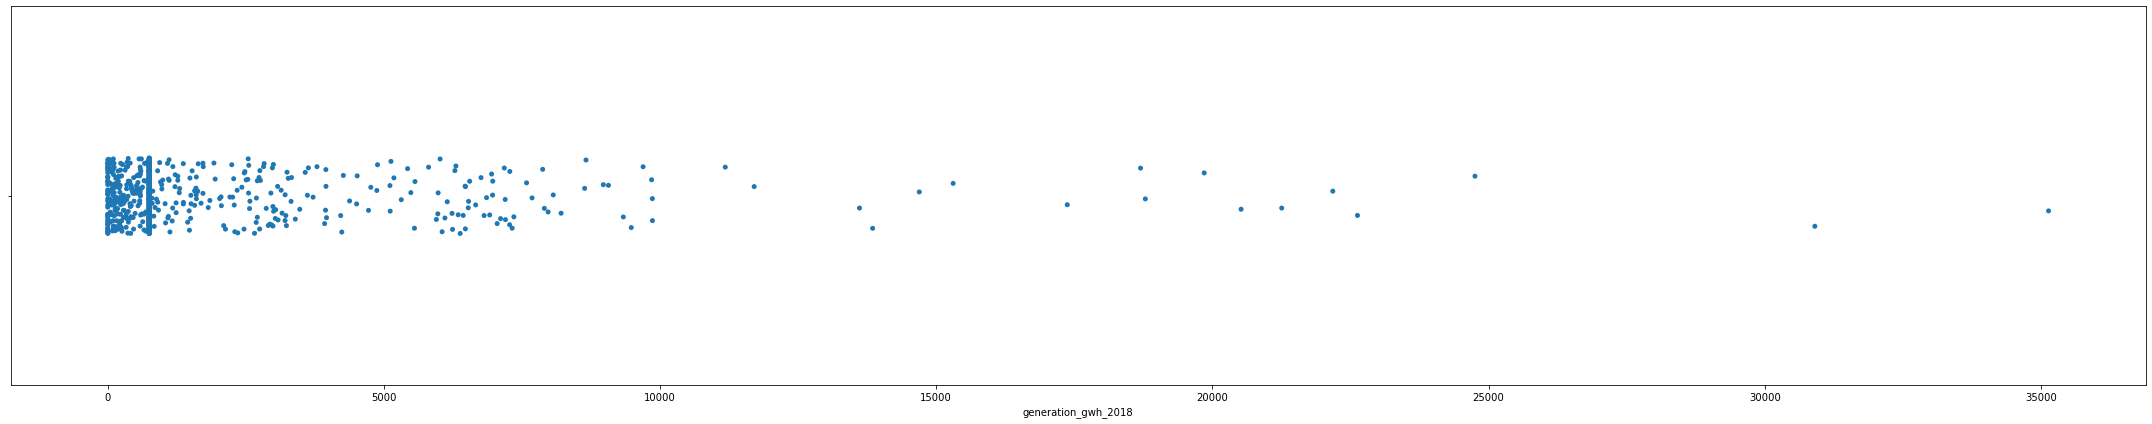

In [375]:

plt.figure(figsize=(30,30))
plt.figure(figsize=(30,6))
sns.stripplot(data['generation_gwh_2016'])


plt.figure(figsize=(30,6))
sns.stripplot(data['generation_gwh_2017'])


plt.figure(figsize=(30,6))
sns.stripplot(data['generation_gwh_2018'])
plt.tight_layout()

**In above plots it can be seen that, the capacity of power generation for 3 plants increased from 30000 to >35000 GWh.**

<AxesSubplot:xlabel='capacity_mw', ylabel='primary_fuel'>

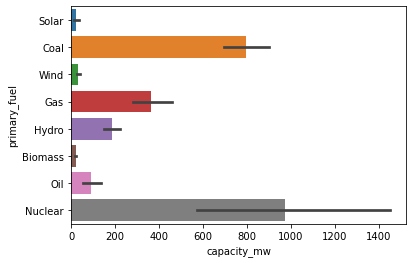

In [376]:
sns.barplot(x='capacity_mw',y='primary_fuel',data=data)

- The above plot says that though nuclear plants are less in number but they have the highest power producing capacity, followed by Coal.
- The least energy capacity plants are of Solar and biomass.

<AxesSubplot:xlabel='capacity_mw', ylabel='com_age'>

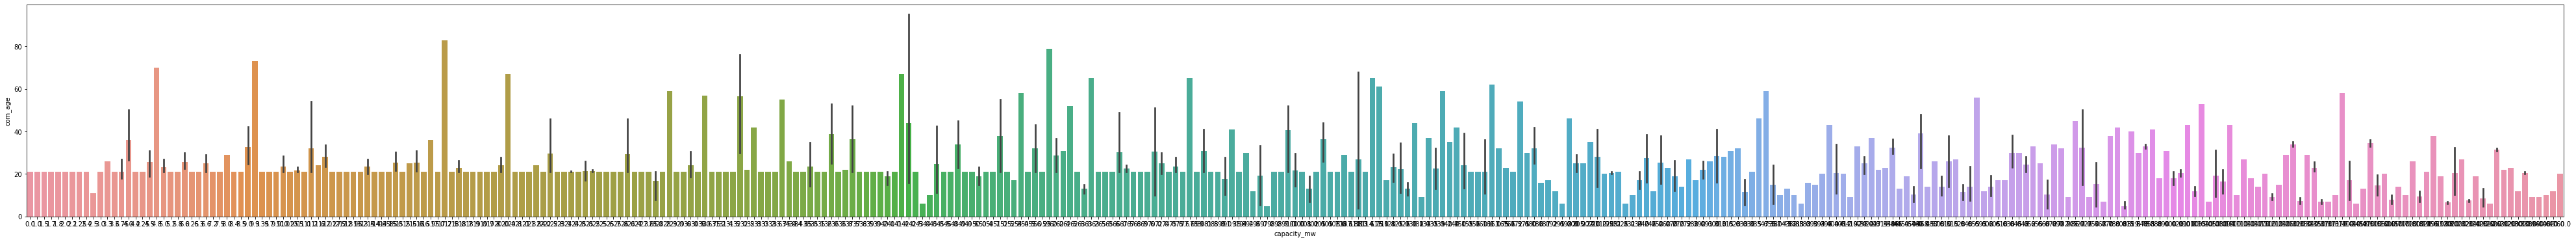

In [377]:
plt.figure(figsize=(70,6))
sns.barplot(x='capacity_mw',y='com_age',data=data)

The plot is showing the power generation capacity of power plants with respect to the age of power plants. Looking at plot we can say that newer plants has better capacity.

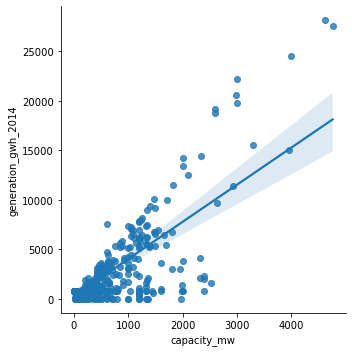

In [378]:

sns.lmplot(x='capacity_mw',y='generation_gwh_2014',data=data)


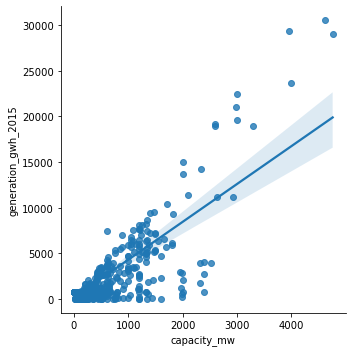

In [379]:
sns.lmplot(x='capacity_mw',y='generation_gwh_2015',data=data)



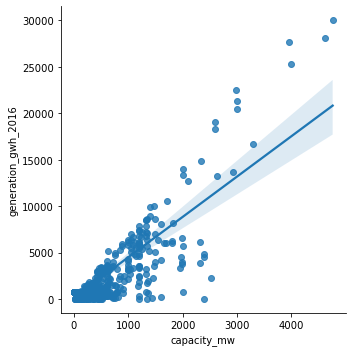

In [380]:
sns.lmplot(x='capacity_mw',y='generation_gwh_2016',data=data)



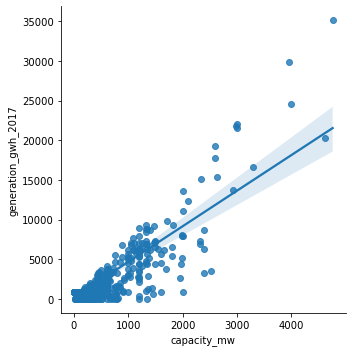

In [381]:
sns.lmplot(x='capacity_mw',y='generation_gwh_2017',data=data)



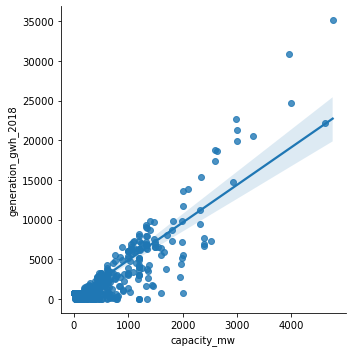

In [382]:
sns.lmplot(x='capacity_mw',y='generation_gwh_2018',data=data)
plt.tight_layout()

- **All the above 5 plots of plant capacity with respect to power generation in 2014,2015,2016.2017 and 2018 shows a positive trend which means that with increase in plant capacity,there is increase in power generation.**

<AxesSubplot:xlabel='primary_fuel', ylabel='com_age'>

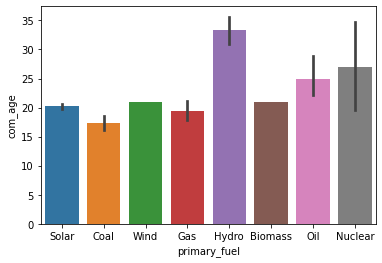

In [383]:
sns.barplot(x='primary_fuel',y='com_age',data=data)

- **Oldest power plants uses Hydro power to generate power.**
- **The recent plants which have been commissioned uses coal to generate power.**
- **Most of the power plants are at a rough age of 20 years.**

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2014'>

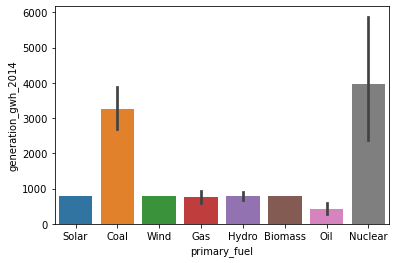

In [384]:
sns.barplot(x='primary_fuel',y='generation_gwh_2014',data=data)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2015'>

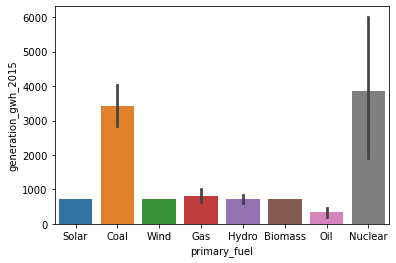

In [385]:
sns.barplot(x='primary_fuel',y='generation_gwh_2015',data=data)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2016'>

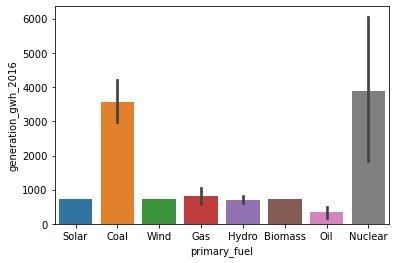

In [386]:
sns.barplot(x='primary_fuel',y='generation_gwh_2016',data=data)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2017'>

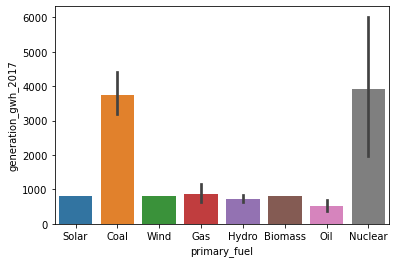

In [387]:
sns.barplot(x='primary_fuel',y='generation_gwh_2017',data=data)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2018'>

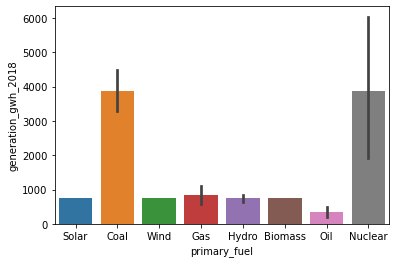

In [388]:
sns.barplot(x='primary_fuel',y='generation_gwh_2018',data=data)

- **From looking at the above plots for 2014,15,16,17 and 18; it can be said that the power plants that used Nuclear as its primary fuel generated more power in past years followed by power plants using Coal.**
- **using oil as primary fuel produces least amount of power.**

<AxesSubplot:xlabel='com_age', ylabel='generation_gwh_2014'>

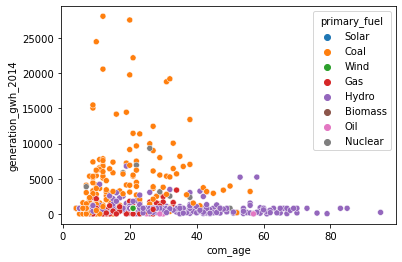

In [389]:
sns.scatterplot(x='com_age',y='generation_gwh_2014',data=data,hue='primary_fuel')

<AxesSubplot:xlabel='com_age', ylabel='generation_gwh_2015'>

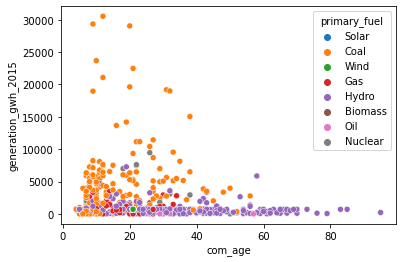

In [390]:
sns.scatterplot(x='com_age',y='generation_gwh_2015',data=data,hue='primary_fuel')

<AxesSubplot:xlabel='com_age', ylabel='generation_gwh_2016'>

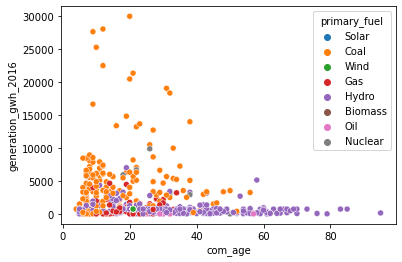

In [391]:
sns.scatterplot(x='com_age',y='generation_gwh_2016',data=data,hue='primary_fuel')

<AxesSubplot:xlabel='com_age', ylabel='generation_gwh_2017'>

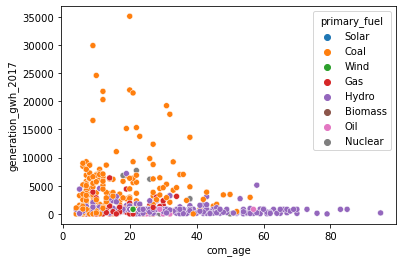

In [392]:
sns.scatterplot(x='com_age',y='generation_gwh_2017',data=data,hue='primary_fuel')

<AxesSubplot:xlabel='com_age', ylabel='generation_gwh_2018'>

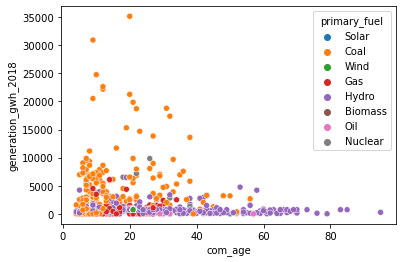

In [393]:
sns.scatterplot(x='com_age',y='generation_gwh_2018',data=data,hue='primary_fuel')

- **From the above 5 plots of commisioned age of power plants with respect to power generation for last 5 years, it can be said that most power is generated from plants that are newly commissioned using primary fuel as coal.**
- **It is also seen that in all these 5 years Hydro power plants are oldest that generates less power.**

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2014'>

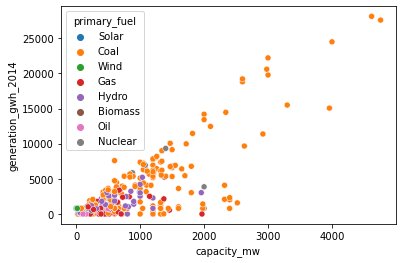

In [394]:
sns.scatterplot(x='capacity_mw',y='generation_gwh_2014',data=data,hue='primary_fuel')

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2015'>

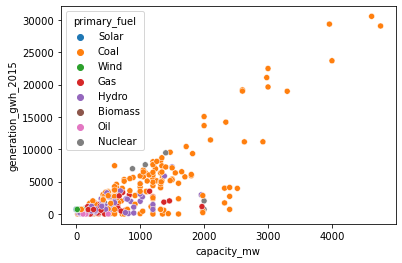

In [395]:
sns.scatterplot(x='capacity_mw',y='generation_gwh_2015',data=data,hue='primary_fuel')

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2016'>

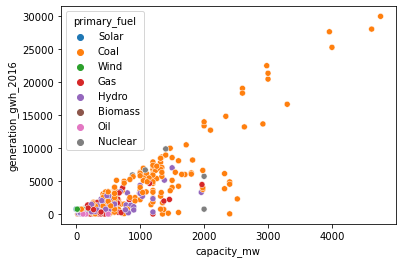

In [396]:
sns.scatterplot(x='capacity_mw',y='generation_gwh_2016',data=data,hue='primary_fuel')

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2017'>

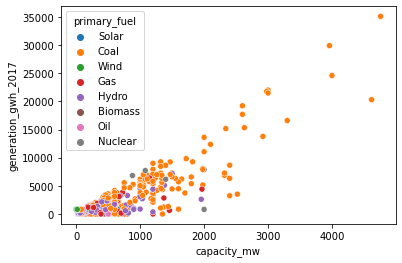

In [397]:
sns.scatterplot(x='capacity_mw',y='generation_gwh_2017',data=data,hue='primary_fuel')

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2018'>

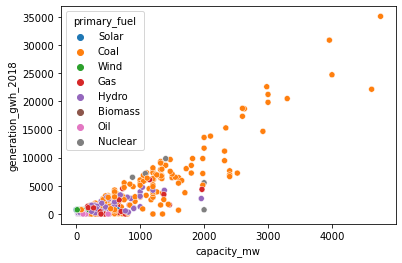

In [398]:
sns.scatterplot(x='capacity_mw',y='generation_gwh_2018',data=data,hue='primary_fuel')

- **From above 5 plots that are plotted for power generation plant capacity with respect to power generated for 5 years, shows that Coal power planst generates higher power as they have higher capacity then other plants.**
- **Nuclear plants have max. capacity of 2000mw and and has generated over approx. 10000gw power per year.**

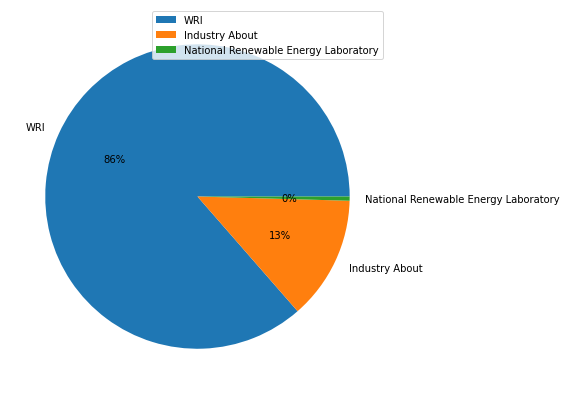

In [399]:
geoloc=data['geolocation_source'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(geoloc, labels=geoloc.index, autopct='%.0f%%')
plt.legend()
plt.show()

**WRI is linked with 86% of power plants for their attribution for geolocation information.**

In [400]:
data.groupby('primary_fuel')[['capacity_mw']].mean()

,capacity_mw
primary_fuel,
Biomass,20.065200
Coal,797.826434
Gas,364.818928
Hydro,185.026972
Nuclear,975.555556
Oil,88.942000
Solar,21.712598
Wind,33.519262


The above data shows the capacity of power plant in megawatts with respect to their primary fuel they use to generate power.

In [401]:
data.groupby('primary_fuel')[['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']].mean()

,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
primary_fuel,,,,,
Biomass,801.123775,711.181225,737.205450,817.977250,751.644375
Coal,3257.406880,3413.109912,3575.861211,3755.297896,3873.884440
Gas,766.925461,813.990113,812.101147,869.301605,831.511252
Hydro,787.437754,710.370516,710.789952,727.997821,741.431429
Nuclear,3963.904522,3843.353469,3879.786161,3933.921917,3885.321597
Oil,432.490450,331.972098,334.380732,531.743827,338.402337
Solar,801.123775,711.181225,737.205450,817.977250,751.644375
Wind,801.123775,711.181225,737.205450,817.977250,751.644375


- The above table shows the average amount power generated from 2014-2018 for different primary fuel types.
- It can be seen and Coal and Nuclear power is leading in producing power.

# Encoding the categorical columns with label encoder.

In [402]:
#importing library for Label Encoder
from sklearn.preprocessing import LabelEncoder

In [403]:
label_enc=LabelEncoder()

In [404]:
#applying label encoder to type and region columns
df1=label_enc.fit_transform(data['primary_fuel'])
df2=label_enc.fit_transform(data['geolocation_source'])

In [405]:
# saving and replacing the encoded data into original dataframe

data['primary_fuel']=df1
data['geolocation_source']=df2

In [406]:
#checking if data is encoded or not
data.head()

,capacity_mw,latitude,longitude,primary_fuel,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,com_age
0,2.5,28.1839,73.2407,6,1,801.123775,711.181225,737.205450,817.977250,751.644375,11.0
1,98.0,24.7663,74.6090,1,2,801.123775,711.181225,737.205450,817.977250,751.644375,21.0
2,39.2,21.9038,69.3732,7,2,801.123775,711.181225,737.205450,817.977250,751.644375,21.0
3,135.0,23.8712,91.3602,2,2,617.789264,843.747000,886.004428,663.774500,626.239128,18.0
4,1800.0,21.9603,82.4091,1,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,7.0


# Since we need to perform machine learning models for 2 columns i.e. (1) capacity_mw (2) primary_fuel, Hence making a new dataframe with same colums that will be used to make 2nd model.

In [407]:
#making dataframe with same columns and values as original dataframe with name as df

df=pd.DataFrame(data,columns=['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'com_age'])

df.head() #printing dataframe

,capacity_mw,latitude,longitude,primary_fuel,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,com_age
0,2.5,28.1839,73.2407,6,1,801.123775,711.181225,737.205450,817.977250,751.644375,11.0
1,98.0,24.7663,74.6090,1,2,801.123775,711.181225,737.205450,817.977250,751.644375,21.0
2,39.2,21.9038,69.3732,7,2,801.123775,711.181225,737.205450,817.977250,751.644375,21.0
3,135.0,23.8712,91.3602,2,2,617.789264,843.747000,886.004428,663.774500,626.239128,18.0
4,1800.0,21.9603,82.4091,1,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,7.0


# Taking capacity_mw column as label.
# Taking dataframe named ''data'' to analyse and then building ML model.

In [408]:
data.describe()

,capacity_mw,latitude,longitude,primary_fuel,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,com_age
count,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000
mean,326.558991,21.226829,77.427884,3.201987,1.732892,1517.479764,1510.953073,1566.275463,1658.048005,1666.019161,23.273731
std,590.324956,6.083822,4.817675,2.278421,0.677467,2787.041277,2986.525073,3006.620856,3048.418036,3170.431466,13.165673
min,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
25%,16.612500,17.065350,74.387550,1.000000,2.000000,801.123775,711.181225,737.205450,817.977250,751.644375,19.000000
50%,59.600000,21.780000,76.719500,3.000000,2.000000,801.123775,711.181225,737.205450,817.977250,751.644375,21.000000
75%,386.625000,25.178075,79.207350,6.000000,2.000000,801.123775,711.181225,737.205450,817.977250,751.644375,24.000000
max,4760.000000,34.649000,95.408000,7.000000,2.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,95.000000


- looking at the table above it can be seen there is presence of outliers in almosr all continuos columns.
- The dataset look like having skewness present.

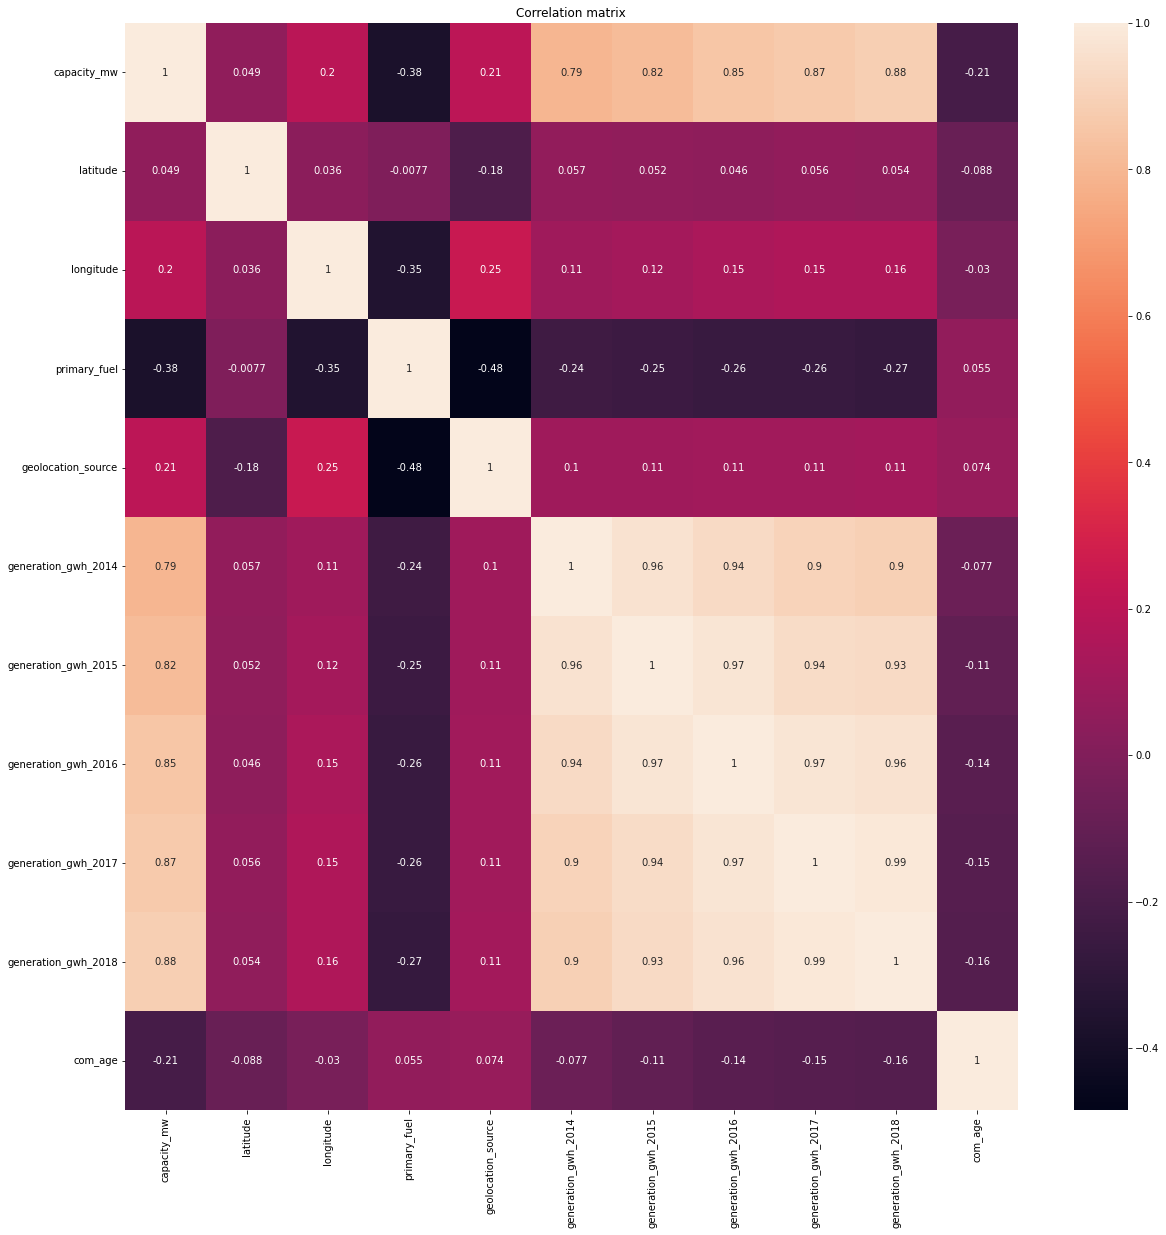

In [409]:
# plotting heatmap to check for collinearity

plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)
plt.title('Correlation matrix')
plt.show()

-The power generation growth columns from 2014-2018 shows multicollinearity. Also these columns are highly related to label(capacity_mw)
- 

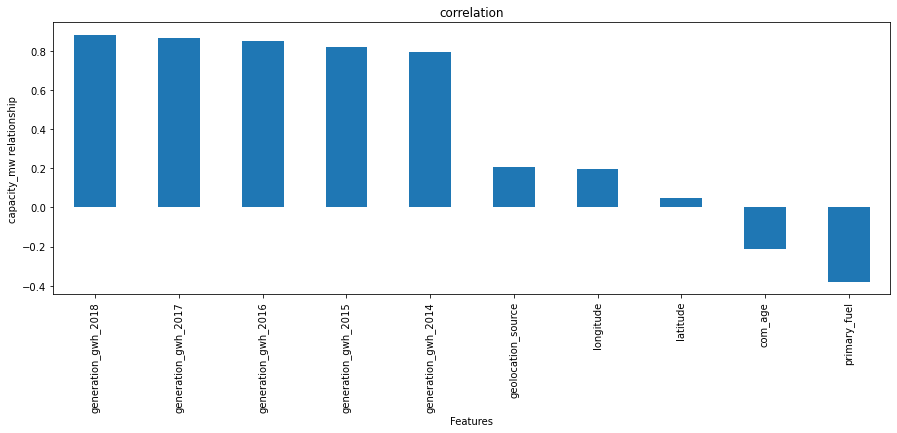

In [410]:
#plotting a coorelation plot that will show relation of features with label(region)

plt.figure(figsize=(15,5))
data.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('capacity_mw relationship')
plt.title('correlation')
plt.show()

It can be seen from above plot that 'generation_gwh_2018' is highest positiveky related and primary_fuel is highly negatively related to label.

In [411]:
data.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'com_age'],
      dtype='object')

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='generation_gwh_2015'>

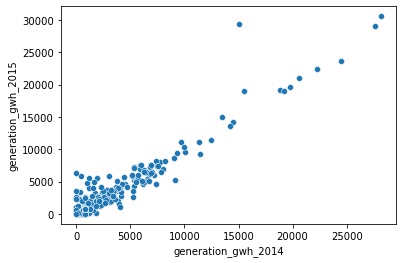

In [412]:
sns.scatterplot(x='generation_gwh_2014',y='generation_gwh_2015',data=data)

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='generation_gwh_2016'>

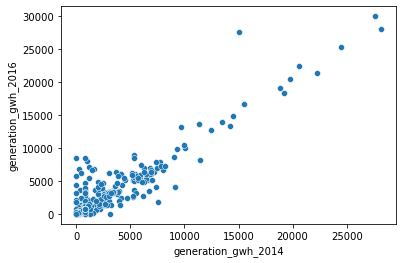

In [413]:
sns.scatterplot(x='generation_gwh_2014',y='generation_gwh_2016',data=data)

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='generation_gwh_2017'>

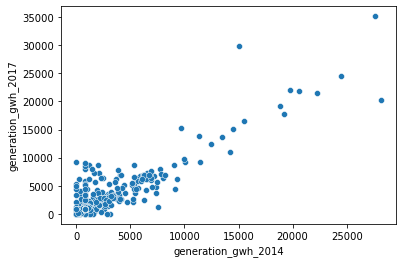

In [414]:
sns.scatterplot(x='generation_gwh_2014',y='generation_gwh_2017',data=data)

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='generation_gwh_2018'>

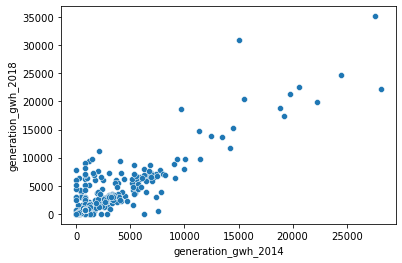

In [415]:
sns.scatterplot(x='generation_gwh_2014',y='generation_gwh_2018',data=data)

- All the four plots plotted against power generated for years 2014-2018, shows a positive trend.

# Outlier removal

In [416]:
features=['latitude', 'longitude', 'generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']

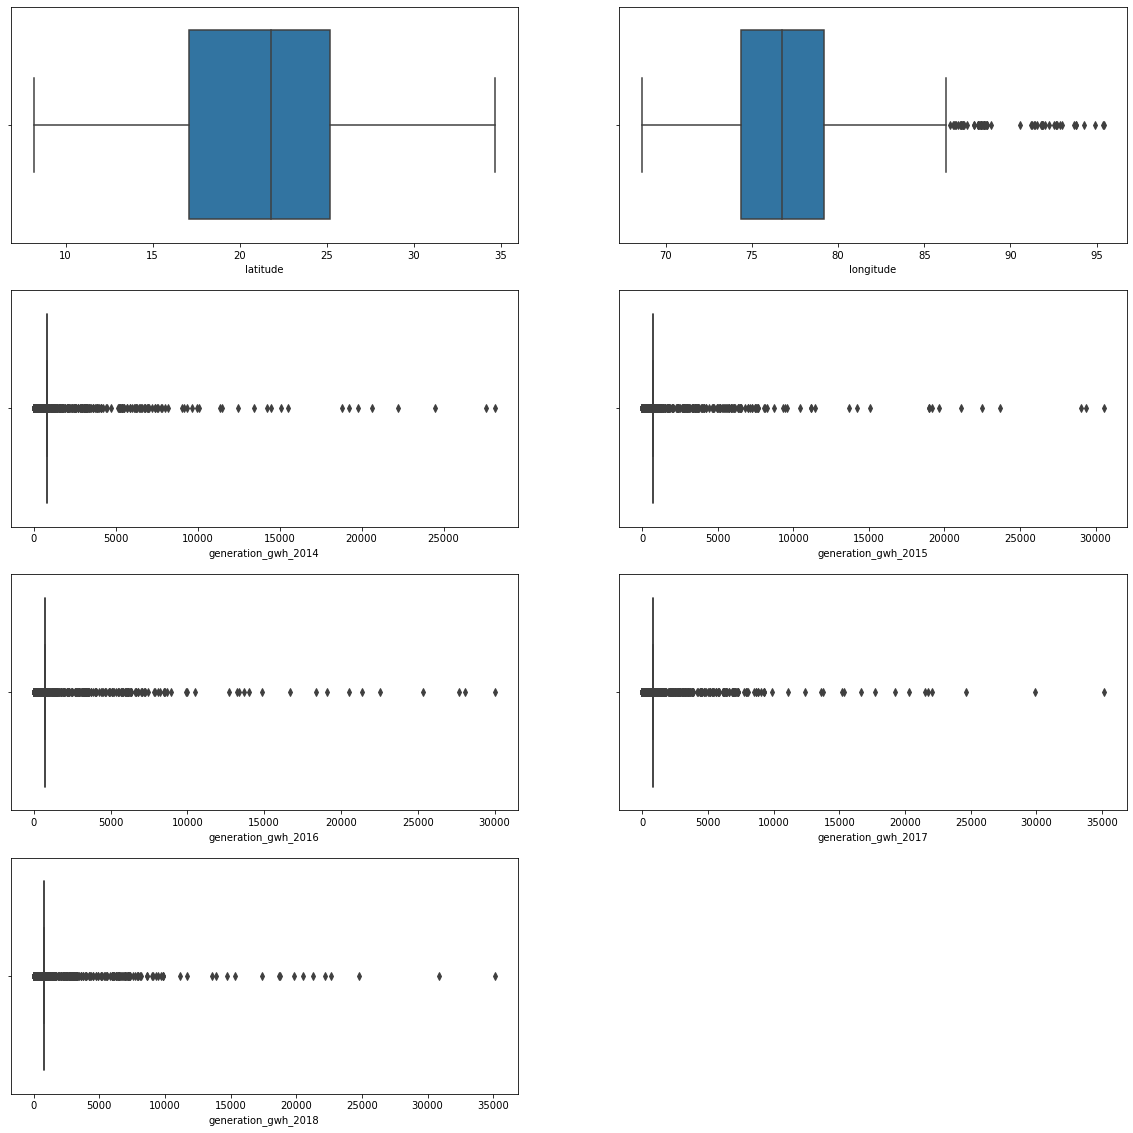

In [417]:
plt.figure(figsize=(20,20))
plotnumber=1

for column in features:
    if plotnumber<=7:
        ax=plt.subplot(4,2,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()

- There are presence of outliers seen in almost all continuous columns except latitude.

**Outlier removal using zscore method.**

In [418]:
#importing zscore library

from scipy.stats import zscore

In [419]:
#inputing continuous data 

z_score=zscore(data[['latitude', 'longitude', 'generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']])

In [420]:
abs_z_score=np.abs(z_score)

In [421]:
filtering_entry=(abs_z_score<3).all(axis=1)

In [422]:
data=data[filtering_entry]

In [423]:
data.shape

(870, 11)

# Data loss after removing outliers

In [424]:
# data loss percentage 

data_loss=((906-870)/870)*100
print(f'data loss in percent after removing outliers is: {data_loss}%')

data loss in percent after removing outliers is: 4.137931034482759%


# Checking for skewness in dataset

In [425]:
data.skew()

capacity_mw            2.205295
latitude              -0.126365
longitude              0.959466
primary_fuel           0.428755
geolocation_source    -2.103554
generation_gwh_2014    2.976418
generation_gwh_2015    2.750086
generation_gwh_2016    2.679950
generation_gwh_2017    2.579859
generation_gwh_2018    2.632591
com_age                1.733981
dtype: float64

All the continuous columns are skewed. This will be further visualized using plots.

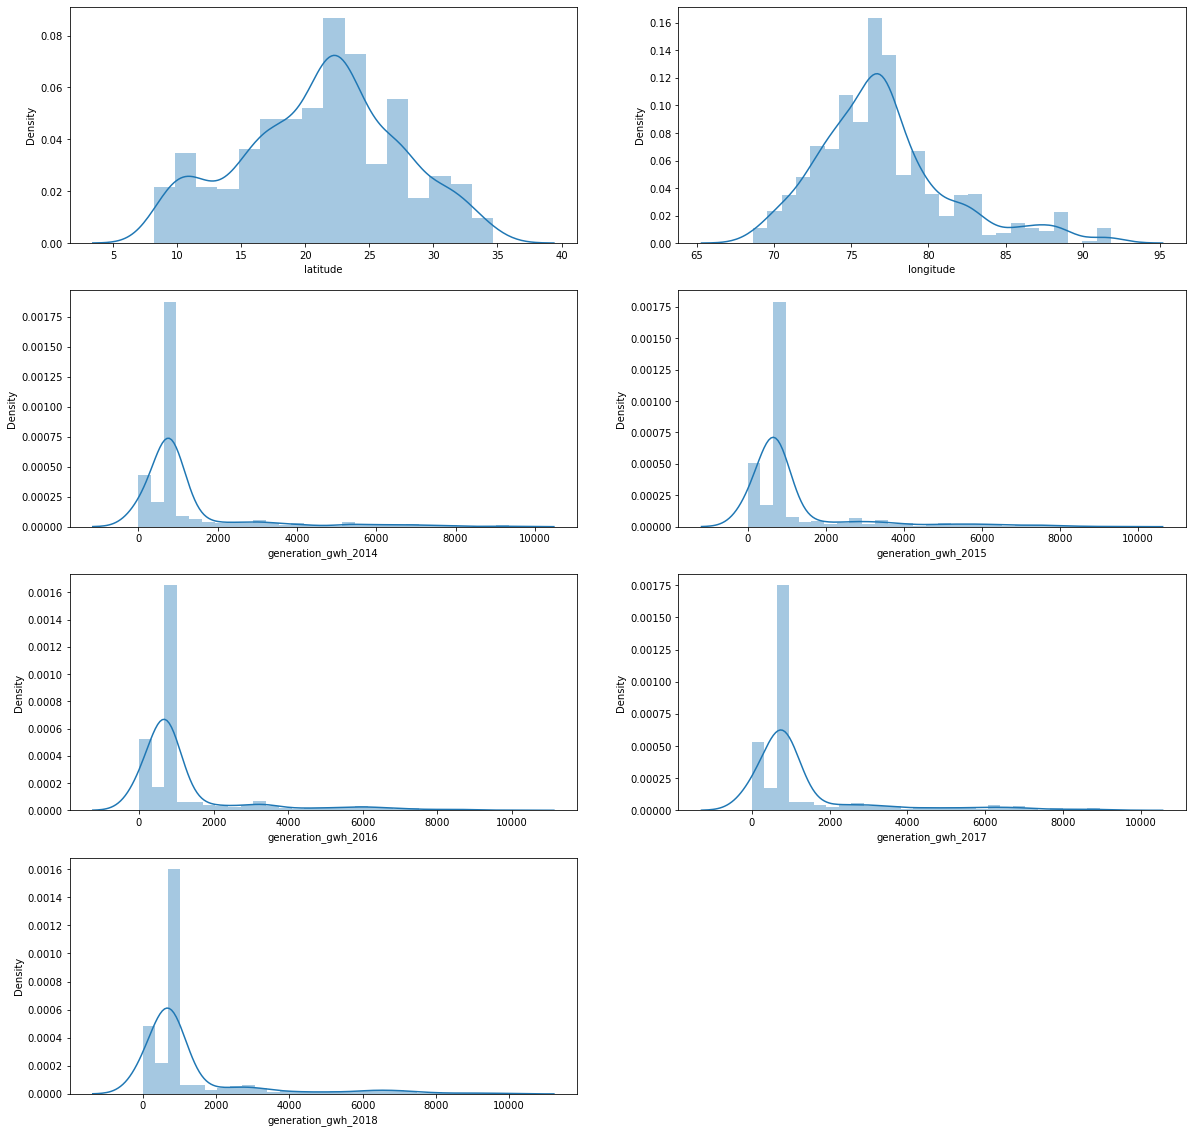

In [426]:
plt.figure(figsize=(20,20))
plotnumber=1

for column in features:
    if plotnumber<=7:
        ax=plt.subplot(4,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()

- As seen above data is highly skewed for all 7 columns.

# Hence removing skewness using Power Transformer

In [427]:
#importing library
from sklearn.preprocessing import PowerTransformer

scaler=PowerTransformer(method='yeo-johnson') #using yeo-johnson method to transform

In [428]:
#transforming the data
data[features]=scaler.fit_transform(data[features])

In [429]:
#printing features to check for skewness after
data[features].skew()

latitude              -0.074196
longitude             -0.001758
generation_gwh_2014    0.229070
generation_gwh_2015    0.164569
generation_gwh_2016    0.145641
generation_gwh_2017    0.127145
generation_gwh_2018    0.136114
dtype: float64

from above output it looks like skewness is lowered and is within +-0.5 range now

# Model building with capacity_mw as label

In [430]:
#importing data scaling library
from sklearn.preprocessing import StandardScaler

#importing library for regression model
from sklearn.ensemble import RandomForestRegressor

#importing r2 score
from sklearn.metrics import r2_score

#importing train test split
from sklearn.model_selection import train_test_split

from sklearn import metrics

In [431]:
#Standardizing data
scaler=StandardScaler()

In [432]:
#diving data into features and labels
x=data.drop(['capacity_mw'],axis=1)
y=data['capacity_mw']

In [433]:
#standardizing features

x_scaled=scaler.fit_transform(x)
print(x_scaled)

[[ 1.15461369 -0.93369228  1.19473901 ... -0.02118735 -0.04500621
  -0.9294463 ]
 [ 0.5853007  -0.5102461  -0.98343144 ... -0.02118735 -0.04500621
  -0.17612202]
 [ 0.11323729 -2.39563924  1.6303731  ... -0.02118735 -0.04500621
  -0.17612202]
 ...
 [-0.95994609 -0.23414111  1.6303731  ... -0.02118735 -0.04500621
  -0.17612202]
 [ 0.51636429 -0.77178988 -0.98343144 ... -0.02118735 -0.04500621
  -0.17612202]
 [-1.79890706  0.25190104  1.6303731  ... -0.02118735 -0.04500621
  -0.17612202]]


# VIF

In [434]:
#importing VIF library

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [435]:
vif=pd.DataFrame()
vif['vif_values']=[variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]
vif['feature_names']=x.columns
vif

,vif_values,feature_names
0,1.071546,latitude
1,1.245792,longitude
2,1.512138,primary_fuel
3,1.402544,geolocation_source
4,3.598601,generation_gwh_2014
5,6.225470,generation_gwh_2015
6,10.050565,generation_gwh_2016
7,9.814977,generation_gwh_2017
8,8.966344,generation_gwh_2018
9,1.075978,com_age


- If any features shows VIF values of >5 then it is said that those features are multicorrelated and one feature which is least related is dropped. But in this dataset seems like all the features are necessary for model building.
- Since all the generation columns are showing multicollinearity I will drop one column that is least related to label wherein in this case 'generation_gwh_2014' is least related to label with VIF value of 3.59, Hence that column will be dropped.

In [436]:
# dropping 'generation_gwh_2014' column

data.drop(['generation_gwh_2014'],axis=1,inplace=True)

In [437]:
data.shape

(870, 10)

**Starting with model building**

In [438]:
rf=RandomForestRegressor()

In [439]:
#finding best random state for linear regression model
for i in range(0,50):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=i)
    rf.fit(x_train,y_train)
    y_pred=rf.predict(x_train)
    pred=rf.predict(x_test)
    print('training score is ',(metrics.r2_score(y_train,y_pred)*100),' for random state ',i)
    print('testing score is ',(metrics.r2_score(y_test,pred)*100),' for random state ',i)
    print('\n')

training score is  97.25042419753579  for random state  0
testing score is  72.1039772240799  for random state  0


training score is  96.75349417607534  for random state  1
testing score is  81.94175144890016  for random state  1


training score is  96.564769251751  for random state  2
testing score is  83.2341431642326  for random state  2


training score is  96.66029596899193  for random state  3
testing score is  80.91932181629372  for random state  3


training score is  96.81539364181008  for random state  4
testing score is  79.78223357039924  for random state  4


training score is  96.96276952113197  for random state  5
testing score is  76.1306015488477  for random state  5


training score is  97.23310690977601  for random state  6
testing score is  74.83019892044828  for random state  6


training score is  96.53318935764092  for random state  7
testing score is  83.1182632970591  for random state  7


training score is  97.31001888182142  for random state  8
testing scor

In [440]:
#making train and test data split

x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=9)

In [441]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [442]:
# since thge model is already trained, below code will help to predict based on train and test data

y_pred=rf.predict(x_train) 

pred=rf.predict(x_test)

#printing r2 score for testing and training models.
#r2 score give value of how good the model has studied and learnt the data

print(f'training R2 score:{r2_score(y_train,y_pred)*100:.2f}%')
print(f'testing R2 score:{r2_score(y_test,pred)*100:.2f}%')

training R2 score:96.70%
testing R2 score:84.01%


# finding cross validation score

In [443]:
#importing library for cross validation score
from sklearn.model_selection import cross_val_score

In [444]:
#finding best value for cv in provided range
for i in range(2,20):
    cv_score=cross_val_score(rf,x_scaled,y,cv=i)
    cv=cv_score.mean()
    print('At cv:-',i)
    print('cross validation score:- ',cv*100)

At cv:- 2
cross validation score:-  77.44210231713313
At cv:- 3
cross validation score:-  78.33867896741134
At cv:- 4
cross validation score:-  78.36479723925022
At cv:- 5
cross validation score:-  77.19423531128719
At cv:- 6
cross validation score:-  77.9467930642288
At cv:- 7
cross validation score:-  77.72729022405265
At cv:- 8
cross validation score:-  77.99931913948083
At cv:- 9
cross validation score:-  77.1061014256265
At cv:- 10
cross validation score:-  76.94704891708535
At cv:- 11
cross validation score:-  76.78584473664846
At cv:- 12
cross validation score:-  77.43005639600878
At cv:- 13
cross validation score:-  76.56608839783938
At cv:- 14
cross validation score:-  76.55575348693124
At cv:- 15
cross validation score:-  77.91620729872731
At cv:- 16
cross validation score:-  76.46290206857635
At cv:- 17
cross validation score:-  75.44816351513343
At cv:- 18
cross validation score:-  76.218098081672
At cv:- 19
cross validation score:-  76.32768113873999


In [445]:
#cross validation score
print('Cross Validation Score for Random Forest regressor model :- ',((cross_val_score(rf,x_scaled,y,cv=3).mean())*100))

Cross Validation Score for Random Forest regressor model :-  79.00287234443888


In [446]:
#importing library for MSE and MAE

from sklearn.metrics import mean_squared_error, mean_absolute_error

In [447]:
#finding mean absolute error() for above model(MAE)
print('mean absolute error',mean_absolute_error(y_test,pred))

#finding root mean_squared_error(RMSE)
print('root mean squared error',np.sqrt(mean_squared_error(y_test,pred)))

mean absolute error 96.62598188095006
root mean squared error 193.4077418832862


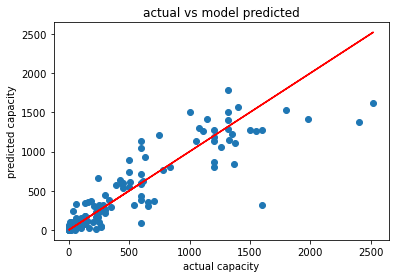

In [448]:
#plotting scatter plot for predicted vs actual

plt.scatter(y_test,pred)
plt.plot(y_test,y_test,color='r')
plt.xlabel('actual capacity')
plt.ylabel('predicted capacity')
plt.title('actual vs model predicted')
plt.show()

In [449]:
#importing libraries for ,Decision Tree and Xgboost regressor

from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor

In [450]:
#saving models in variables
xgb=xgb.XGBRegressor()
knn=KNeighborsRegressor()
dt=DecisionTreeRegressor()

# XGB Model

In [451]:
#train_test split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=9)

#training the model
xgb.fit(x_train,y_train)

#predicting model on train and test data
y_pred_xgb=xgb.predict(x_train)
pred_xgb=xgb.predict(x_test)


print(f'Training R2 score for XGB regressor model:{r2_score(y_train,y_pred_xgb)*100:.2f}%')
print(f'Testing R2 score for XGB regressor model:{r2_score(y_test,pred_xgb)*100:.2f}%')

Training R2 score for XGB regressor model:99.97%
Testing R2 score for XGB regressor model:85.31%


In [452]:
#cross validation score
print('Cross Validation Score for XGB regressor model :- ',((cross_val_score(xgb,x_scaled,y,cv=3).mean())*100))

Cross Validation Score for XGB regressor model :-  75.6815847915575


In [453]:
#finding mean absolute error() for above model(MAE)
print('mean absolute error',mean_absolute_error(y_test,pred_xgb))

#finding root mean_squared_error(RMSE)
print('root mean squared error',np.sqrt(mean_squared_error(y_test,pred_xgb)))

mean absolute error 91.76707108138899
root mean squared error 185.39352974859494


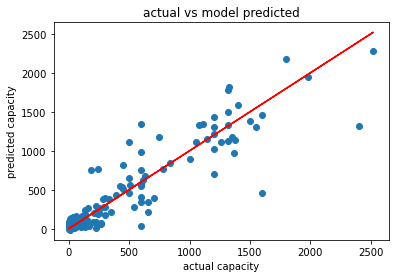

In [454]:
#plotting scatter plot for predicted vs actual

plt.scatter(y_test,pred_xgb)
plt.plot(y_test,y_test,color='r')
plt.xlabel('actual capacity')
plt.ylabel('predicted capacity')
plt.title('actual vs model predicted')
plt.show()

# K Neighbours Model

In [455]:
knn=KNeighborsRegressor()

In [456]:
#train_test split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=9)

#training the model
knn.fit(x_train,y_train)

#predicting model on train and test data
y_pred_knn=knn.predict(x_train)
pred_knn=knn.predict(x_test)


print(f'Training R2 score for K neighbours regressor model:{r2_score(y_train,y_pred_knn)*100:.2f}%')
print(f'Testing R2 score for K neighbours regressor model:{r2_score(y_test,pred_knn)*100:.2f}%')

Training R2 score for K neighbours regressor model:80.43%
Testing R2 score for K neighbours regressor model:78.03%


In [457]:
#cross validation score
print('Cross Validation Score for KNN regressor model :- ',((cross_val_score(knn,x_scaled,y,cv=3).mean())*100))

Cross Validation Score for KNN regressor model :-  72.5092856011298


In [458]:
#finding mean absolute error() for above model(MAE)
print('mean absolute error',mean_absolute_error(y_test,pred_knn))

#finding root mean_squared_error(RMSE)
print('root mean squared error',np.sqrt(mean_squared_error(y_test,pred_knn)))

mean absolute error 116.73603486238532
root mean squared error 226.7501177362817


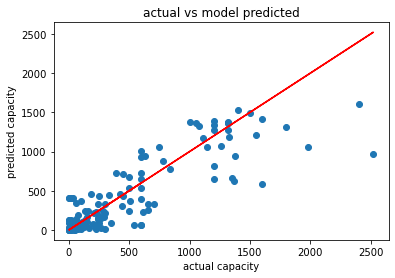

In [459]:
#plotting scatter plot for predicted vs actual

plt.scatter(y_test,pred_knn)
plt.plot(y_test,y_test,color='r')
plt.xlabel('actual capacity')
plt.ylabel('predicted capacity')
plt.title('actual vs model predicted')
plt.show()

# Decision Tree Model

In [460]:
dt=DecisionTreeRegressor()

In [461]:
#train_test split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=9)

#training the model
dt.fit(x_train,y_train)

#predicting model on train and test data
y_pred_dt=dt.predict(x_train)
pred_dt=dt.predict(x_test)


print(f'Training R2 score for Decision Tree regressor model:{r2_score(y_train,y_pred_dt)*100:.2f}%')
print(f'Testing R2 score for Decision Tree regressor model:{r2_score(y_test,pred_dt)*100:.2f}%')

Training R2 score for Decision Tree regressor model:99.99%
Testing R2 score for Decision Tree regressor model:66.54%


In [462]:
#cross validation score
print('Cross Validation Score for Decision Tree regressor model :- ',((cross_val_score(dt,x_scaled,y,cv=3).mean())*100))

Cross Validation Score for Decision Tree regressor model :-  62.74496015506942


In [463]:
#finding mean absolute error() for above model(MAE)
print('mean absolute error',mean_absolute_error(y_test,pred_dt))

#finding root mean_squared_error(RMSE)
print('root mean squared error',np.sqrt(mean_squared_error(y_test,pred_dt)))

mean absolute error 129.78309174311926
root mean squared error 279.8023659972363


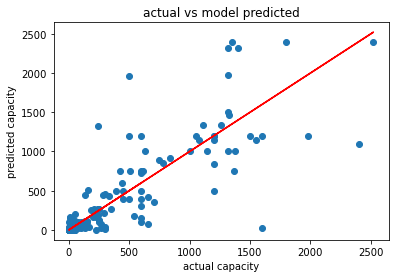

In [464]:
#plotting scatter plot for predicted vs actual

plt.scatter(y_test,pred_dt)
plt.plot(y_test,y_test,color='r')
plt.xlabel('actual capacity')
plt.ylabel('predicted capacity')
plt.title('actual vs model predicted')
plt.show()

# Gradient Boosting Regressor

In [465]:
from sklearn.ensemble import GradientBoostingRegressor

In [466]:
gbdt=GradientBoostingRegressor()

In [467]:
#train_test split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=9)

#training the model
gbdt.fit(x_train,y_train)

#predicting model on train and test data
y_pred_gbdt=gbdt.predict(x_train)
pred_gbdt=gbdt.predict(x_test)


print(f'Training R2 score for Decision Tree regressor model:{r2_score(y_train,y_pred_gbdt)*100:.2f}%')
print(f'Testing R2 score for Decision Tree regressor model:{r2_score(y_test,pred_gbdt)*100:.2f}%')

Training R2 score for Decision Tree regressor model:95.70%
Testing R2 score for Decision Tree regressor model:81.73%


In [485]:
#cross validation score
print('Cross Validation Score for Gradient Boosting regressor model :- ',((cross_val_score(gbdt,x_scaled,y,cv=3).mean())*100))

Cross Validation Score for Gradient Boosting regressor model :-  76.89833838967543


In [469]:
#finding mean absolute error() for above model(MAE)
print('mean absolute error',mean_absolute_error(y_test,pred_gbdt))

#finding root mean_squared_error(RMSE)
print('root mean squared error',np.sqrt(mean_squared_error(y_test,pred_gbdt)))

mean absolute error 103.6751528025002
root mean squared error 206.7796265760111


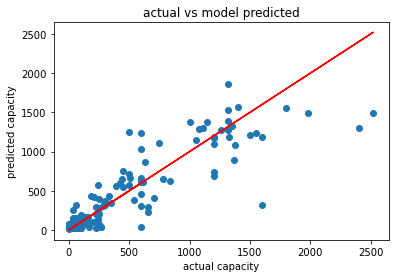

In [470]:
#plotting scatter plot for predicted vs actual

plt.scatter(y_test,pred_gbdt)
plt.plot(y_test,y_test,color='r')
plt.xlabel('actual capacity')
plt.ylabel('predicted capacity')
plt.title('actual vs model predicted')
plt.show()

# The following dataframe shows the training, testing and cross validation scores of different regression models with MAE and RMSE values.

In [488]:
column=pd.DataFrame({'Model':['Random Forest','XGB','KNeighbors','Decision Tree','Gradient Boosting'],
                    'Training scores':[96.70,99.97,80.43,99.99,95.70],
                    'Testing scores':[84.01,85.31,78.03,66.54,81.73],
                    'Cross validation score':[79.13,75.68,72.50,62.75,76.89],
                    'RMSE':[193.40,185.39,226.75,279.41,206.77]})
column

,Model,Training scores,Testing scores,Cross validation score,RMSE
0,Random Forest,96.70,84.01,79.13,193.40
1,XGB,99.97,85.31,75.68,185.39
2,KNeighbors,80.43,78.03,72.50,226.75
3,Decision Tree,99.99,66.54,62.75,279.41
4,Gradient Boosting,95.70,81.73,76.89,206.77


- I'm choosing XGB it has seen most or almost all the data giving good testing accuracy and cross validation scores with least RMSE value.

 # Hence doing hyperparameter tuning on XGB regressor model

In [489]:
# Hyperparameter tuning for XGB regression model

#importing library for grid search cv

from sklearn.model_selection import GridSearchCV

In [490]:
import xgboost as xgb

In [491]:
xgb1=xgb.XGBRegressor()

In [492]:
#setting parameters for tuning
grid_param={'n_estimators':[2,3,4,5],
           'max_depth':[1,2,3,4,5],
            'max_leaves':[3,4,5,6],
            'booster':['gbtree', 'gblinear','dart']}

In [493]:
#saving model into variable 
grid=GridSearchCV(xgb1,param_grid=grid_param)

In [494]:
#training the model to find best parameters
grid.fit(x_train,y_train)

[15:50:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_depth", "max_leaves" } are not used.

[15:50:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_depth", "max_leaves" } are not used.

[15:50:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_depth", "max_leaves" } are not used.

[15:50:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_depth", "max_leaves" } are not used.

[15:50:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.c

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'booster': ['gbtree', 'gblinear', 'dart'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_leaves': [3, 4, 5, 6],
                         'n_estimators': [2, 3, 4, 5]})

In [478]:
#printing best parameters
best_parameters=grid.best_params_
print(best_parameters)

{'booster': 'gbtree', 'max_depth': 2, 'max_leaves': 3, 'n_estimators': 5}


In [496]:
#using best parameters fetched into XGB model and using it on train data

xgb1=xgb.XGBRegressor(booster='gbtree',
                          max_depth=2, 
                          max_leaves= 3,  
                          n_estimators= 5)


In [497]:
xgb1.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=2, max_leaves=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=5, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [498]:
#predicting model on train and test data
y_pred_xgb1=xgb1.predict(x_train)
pred_xgb1=xgb1.predict(x_test)


print(f'Training R2 score for XGB model regressor model:{r2_score(y_train,y_pred_xgb1)*100:.2f}%')
print(f'Testing R2 score for XGB model regressor model:{r2_score(y_test,pred_xgb1)*100:.2f}%')

Training R2 score for XGB model regressor model:73.89%
Testing R2 score for XGB model regressor model:77.23%


In [499]:
#cross validation score for tuned model
cvs_xgb1=cross_val_score(xgb1,x_scaled,y,cv=3).mean()
print('Cross Validation Score for XGB regressor model is- ',((cvs_xgb1)*100))

Cross Validation Score for XGB regressor model is-  71.06736861939478


In [500]:
#finding mean absolute error() for above model(MAE)
print('mean absolute error',mean_absolute_error(y_test,pred_xgb1))

#finding root mean_squared_error(RMSE)
print('root mean squared error',np.sqrt(mean_squared_error(y_test,pred_xgb1)))

mean absolute error 119.14974902651726
root mean squared error 230.81401486231073


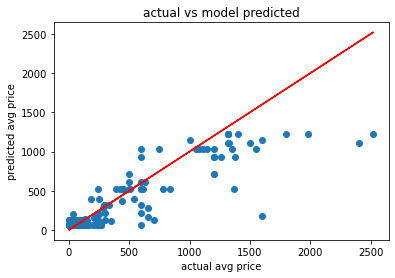

In [501]:
#plotting scatter plot for predicted vs actual

plt.scatter(y_test,pred_xgb1)
plt.plot(y_test,y_test,color='r')
plt.xlabel('actual avg price')
plt.ylabel('predicted avg price')
plt.title('actual vs model predicted')
plt.show()

**It can be seen that tuned model does not give provide good accuracy as the original XGB regressor model, hence the original XGB model is best for machine learning, hence that model will be saved.**

# saving the model using pickle

In [502]:
import pickle

In [504]:
pickle.dump(xgb,open('global_ca','wb'))

# Moving with the second part i.e. using primary_fuel as label.

In [505]:
#printing dataset

df

,capacity_mw,latitude,longitude,primary_fuel,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,com_age
0,2.5,28.1839,73.2407,6,1,801.123775,711.181225,737.205450,817.977250,751.644375,11.0
1,98.0,24.7663,74.6090,1,2,801.123775,711.181225,737.205450,817.977250,751.644375,21.0
2,39.2,21.9038,69.3732,7,2,801.123775,711.181225,737.205450,817.977250,751.644375,21.0
3,135.0,23.8712,91.3602,2,2,617.789264,843.747000,886.004428,663.774500,626.239128,18.0
4,1800.0,21.9603,82.4091,1,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,7.0
...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2,801.123775,0.994875,233.596650,865.400000,686.500000,6.0
903,3.0,12.8932,78.1654,6,0,801.123775,711.181225,737.205450,817.977250,751.644375,21.0
904,25.5,15.2758,75.5811,7,2,801.123775,711.181225,737.205450,817.977250,751.644375,21.0
905,80.0,24.3500,73.7477,1,2,801.123775,711.181225,737.205450,817.977250,751.644375,21.0


In [517]:
df.shape

(906, 11)

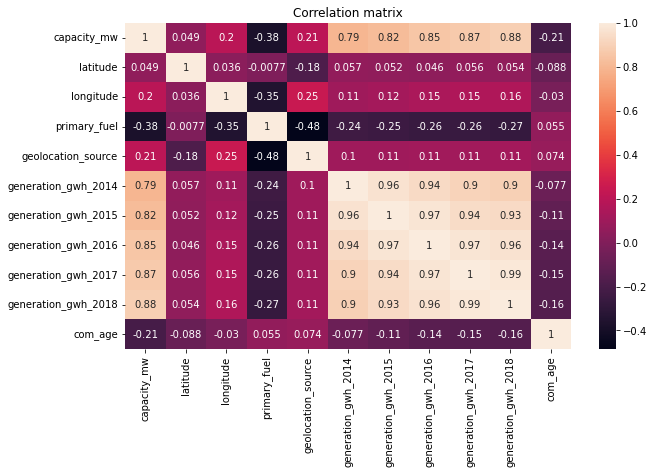

In [507]:
#finding correlation within dataset
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation matrix')
plt.show()

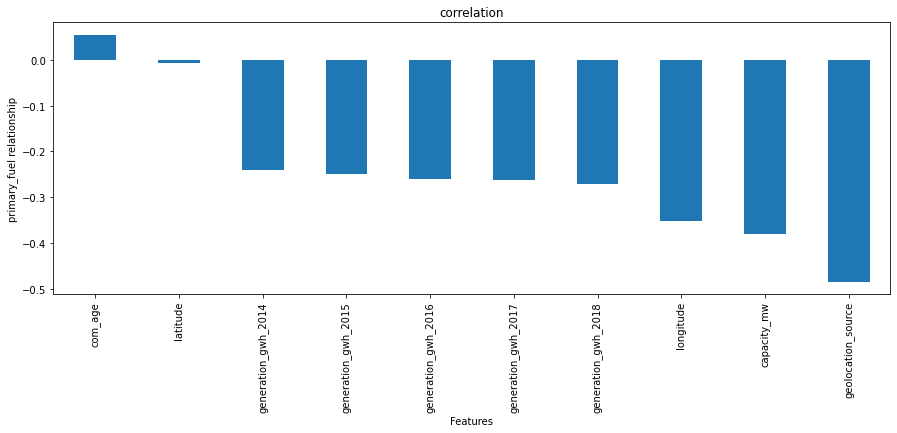

In [514]:
#plotting a coorelation plot that will show relation of features with label(region)

plt.figure(figsize=(15,5))
df.corr()['primary_fuel'].sort_values(ascending=False).drop(['primary_fuel']).plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('primary_fuel relationship')
plt.title('correlation')
plt.show()

- only feature i.e. age of plant is positively related to label while all other columns are negatively related.
- geolocation source is hughest negatively related to label.

# Checking for outliers in dataset

In [509]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'com_age'],
      dtype='object')

In [510]:
features=['capacity_mw','latitude', 'longitude','generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'com_age']

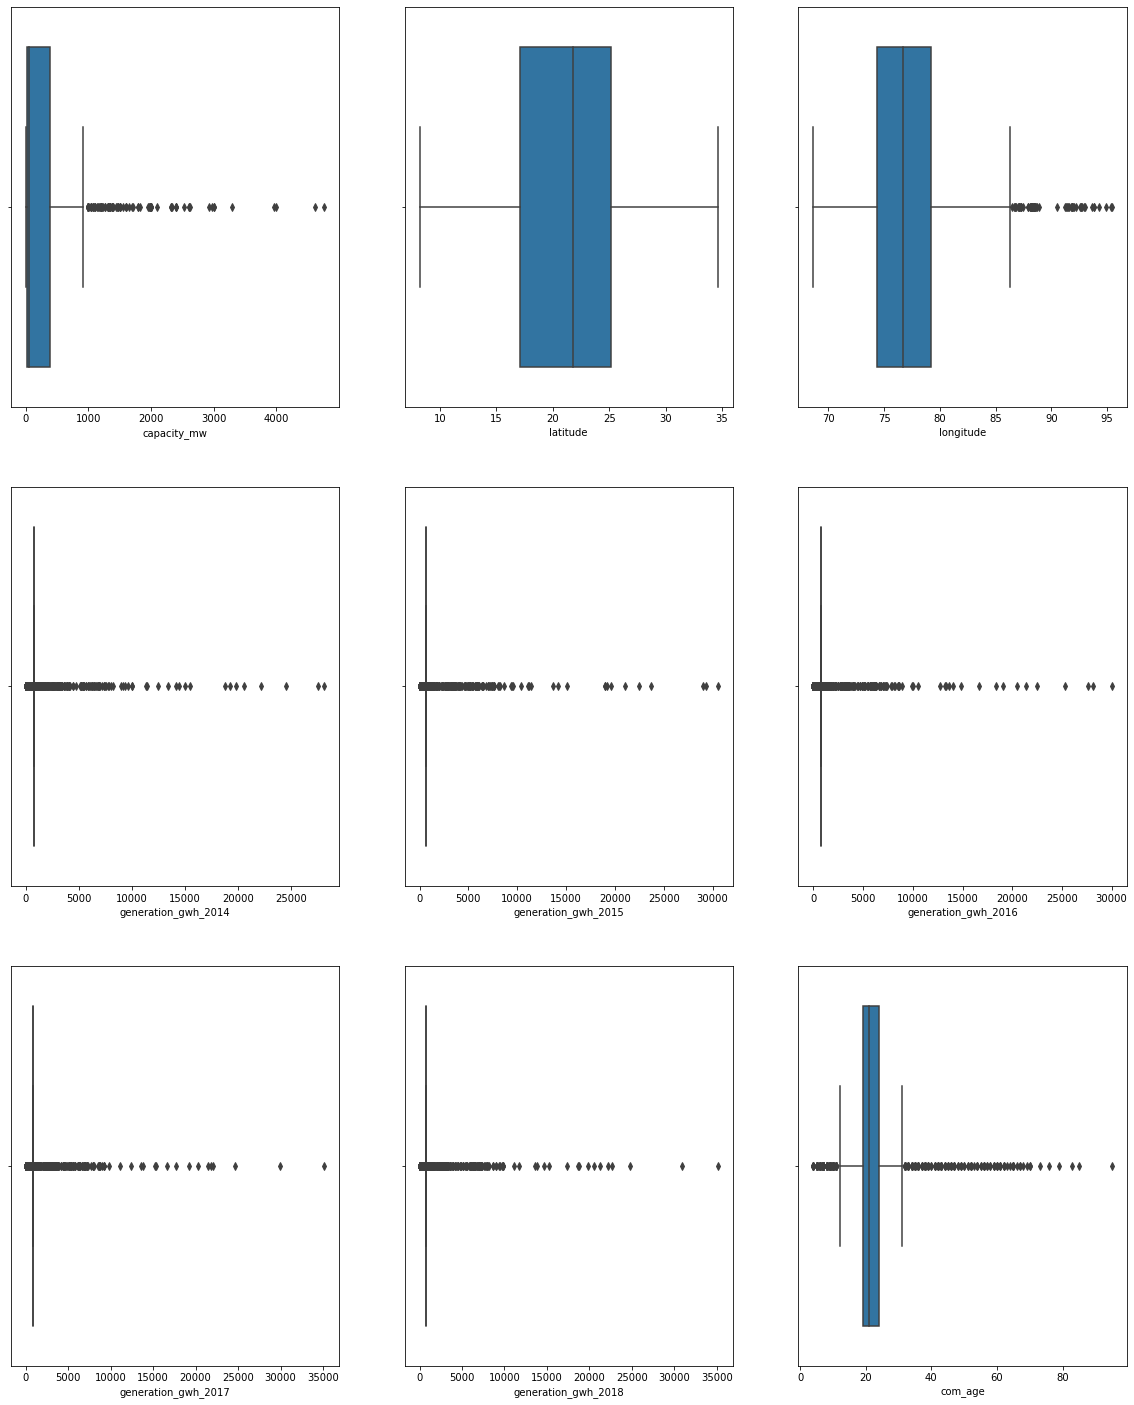

In [515]:
plt.figure(figsize=(20,25))
plotnumber=1

for column in features:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()

**It can be seen that there are outliers in many columns hence removing them below.**

# Removal of outliers using z-score method

In [518]:
from scipy.stats import zscore

In [519]:
z_score=zscore(df[['capacity_mw','latitude', 'longitude','generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'com_age']])

In [520]:
abs_z_score=np.abs(z_score)

In [521]:
filtering_entry=(abs_z_score<3).all(axis=1)

In [522]:
df=df[filtering_entry]

In [523]:
df.shape

(845, 11)

# Data loss after removing outliers

In [524]:
# data loss percentage 
data_loss=((906-845)/845)*100
print(f'data loss in percent after removing outliers is: {data_loss}%')

data loss in percent after removing outliers is: 7.218934911242604%


# Checking for skewness in dataset

In [525]:
df.skew()

capacity_mw            1.990819
latitude              -0.132839
longitude              0.948191
primary_fuel           0.406654
geolocation_source    -2.054718
generation_gwh_2014    2.958847
generation_gwh_2015    2.758112
generation_gwh_2016    2.697113
generation_gwh_2017    2.595931
generation_gwh_2018    2.661315
com_age                1.287099
dtype: float64

In [526]:
#compiling continuous data columns in features list

features=['capacity_mw','latitude', 'longitude','generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'com_age']

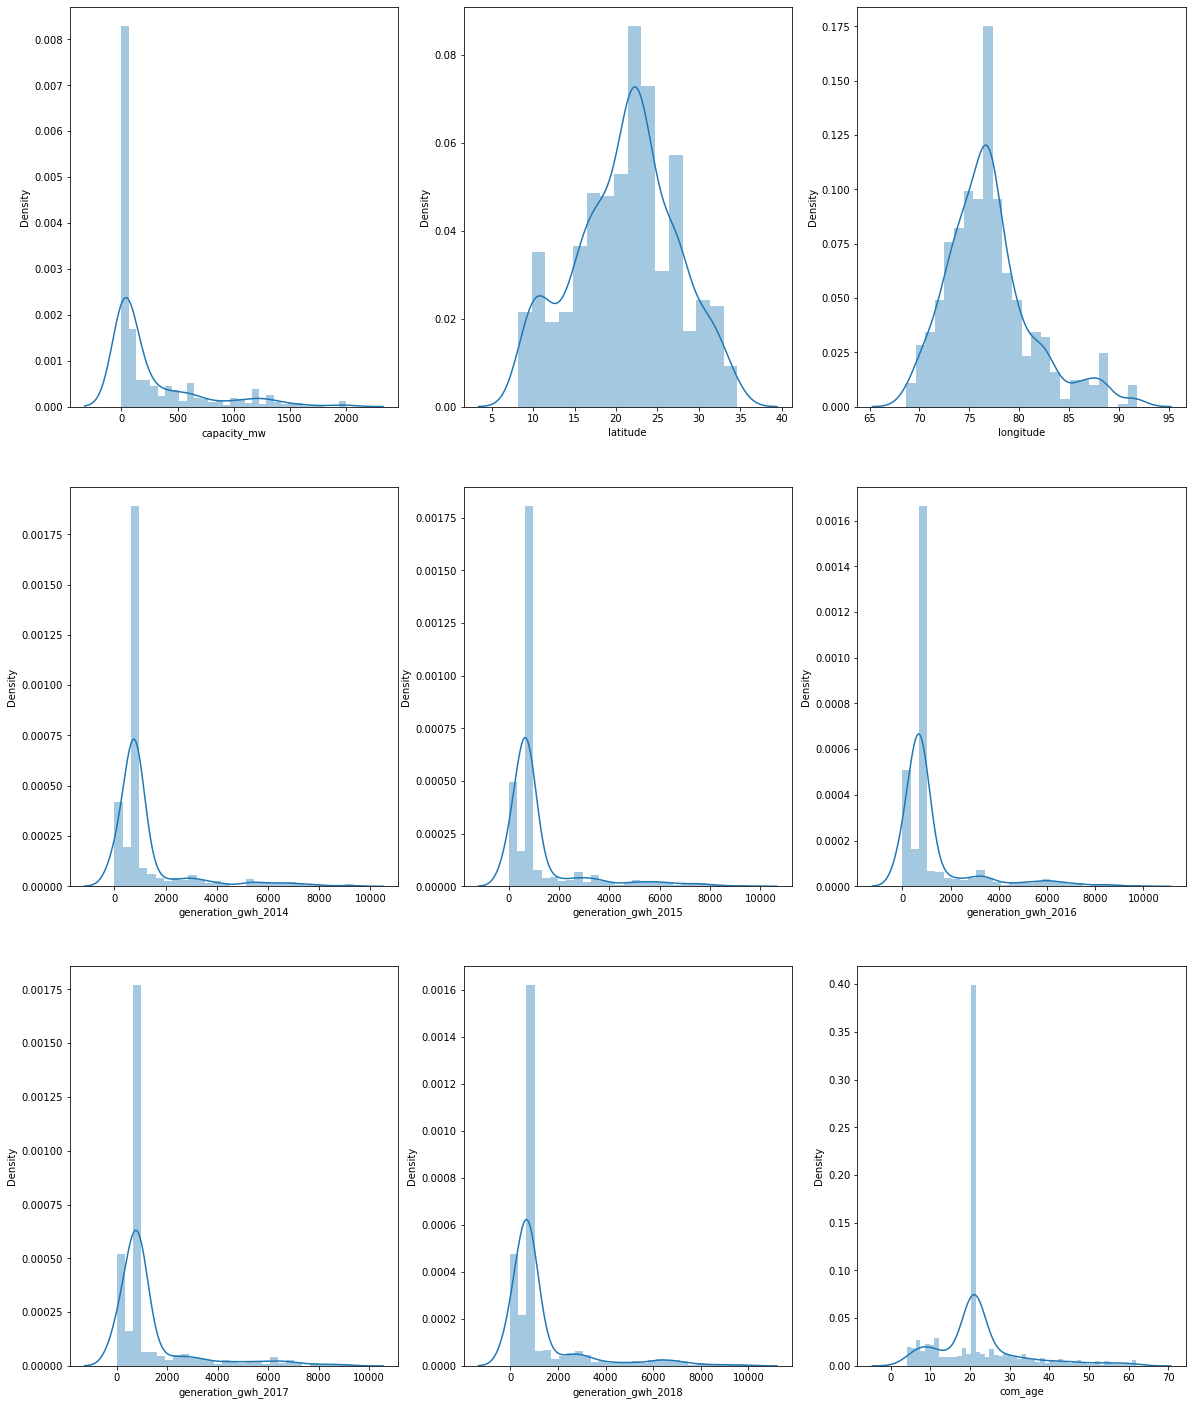

In [528]:
#plotting distplots for continuous columns 

plt.figure(figsize=(20,25))
plotnumber=1

for column in features:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()

**skewness can be seen in above plots for all the columns, hence removing skewness using power transformer method.**
# Hence removing skewness using Power Transformer

In [529]:
#importing library
from sklearn.preprocessing import PowerTransformer

scaler=PowerTransformer(method='yeo-johnson') #using yeo-johnson method to transform

In [530]:
#transforming the data
df[features]=scaler.fit_transform(df[features])

In [531]:
#printing features to check for skewness
df[features].skew()

capacity_mw            0.014894
latitude              -0.072998
longitude              0.000621
generation_gwh_2014    0.234335
generation_gwh_2015    0.167994
generation_gwh_2016    0.153677
generation_gwh_2017    0.130709
generation_gwh_2018    0.136871
com_age                0.023717
dtype: float64

In [532]:
#checking value count in label
df['primary_fuel'].value_counts()

1    233
3    220
6    126
7    122
2     65
0     50
5     20
4      9
Name: primary_fuel, dtype: int64

- It can be seen that values of some fuels are oversampled,
# Hence applying SMOTE to remove Oversampling


In [540]:
#splitting data into features and label

x=df.drop(['primary_fuel'],axis=1)
y=df['primary_fuel']

In [541]:
#importing library for SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter

sm=SMOTE()

In [542]:
x_new,y_new=sm.fit_resample(x,y)
print('The no. of classes before fit',format(Counter(y)))
print('The no. of classes after fit',format(Counter(y_new)))

The no. of classes before fit Counter({1: 233, 3: 220, 6: 126, 7: 122, 2: 65, 0: 50, 5: 20, 4: 9})
The no. of classes after fit Counter({6: 233, 1: 233, 7: 233, 2: 233, 3: 233, 0: 233, 5: 233, 4: 233})


# Scaling the data

In [544]:
#importing data scaling library
from sklearn.preprocessing import StandardScaler

In [546]:
#Standardizing data
scaler=StandardScaler()

In [545]:
x=df.drop(['primary_fuel'],axis=1)
y=df['primary_fuel']

In [547]:
x_scaled=scaler.fit_transform(x)

In [548]:
x_scaled

array([[-1.6752324 ,  1.16403803, -0.91755595, ..., -0.0257632 ,
        -0.04748925, -1.12703964],
       [ 0.23039949,  0.58917874, -0.49592063, ..., -0.0257632 ,
        -0.04748925,  0.04229432],
       [-0.2677451 ,  0.11319494, -2.37245854, ..., -0.0257632 ,
        -0.04748925,  0.04229432],
       ...,
       [-0.50193084, -0.96610428, -0.22093287, ..., -0.0257632 ,
        -0.04748925,  0.04229432],
       [ 0.12046092,  0.5196294 , -0.75635932, ..., -0.0257632 ,
        -0.04748925,  0.04229432],
       [-0.73757364, -1.80622838,  0.26327502, ..., -0.0257632 ,
        -0.04748925,  0.04229432]])

# VIF

In [ ]:
#importing VIF library

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [549]:
vif=pd.DataFrame()
vif['vif_values']=[variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]
vif['feature_names']=x.columns
vif

,vif_values,feature_names
0,1.737765,capacity_mw
1,1.088788,latitude
2,1.192828,longitude
3,1.476758,geolocation_source
4,3.618408,generation_gwh_2014
5,6.272377,generation_gwh_2015
6,10.940369,generation_gwh_2016
7,9.710018,generation_gwh_2017
8,9.214826,generation_gwh_2018
9,1.154574,com_age


- If any features shows VIF values of >5 then it is said that those features are multicorrelated and one feature which is least related is dropped. But in this dataset seems like all the features are necessary for model building.
- Since all the generation columns are showing multicollinearity I will drop one column that is least related to label wherein in this case 'generation_gwh_2014' is least related to label with VIF value of 3.61, Hence that column will be dropped.

In [552]:
df.drop(['generation_gwh_2014'],axis=1,inplace=True)

In [553]:
df.shape

(845, 10)

# Starting with model building

In [562]:

#importing libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

In [563]:
#assigning variable to model

rf=RandomForestClassifier()

In [564]:
#finding best random state for model
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=0.25,random_state=i)
    rf.fit(x_train,y_train)
    y_pred=rf.predict(x_train)
    pred=rf.predict(x_test)
    print('training accuracy is ',(accuracy_score(y_train,y_pred)*100),' for random state ',i)
    print('testing accuracy is ',(accuracy_score(y_test,pred)*100),' for random state ',i)
    '\n'

training accuracy is  100.0  for random state  0
testing accuracy is  90.77253218884121  for random state  0
training accuracy is  99.92846924177397  for random state  1
testing accuracy is  89.91416309012875  for random state  1
training accuracy is  100.0  for random state  2
testing accuracy is  89.27038626609442  for random state  2
training accuracy is  99.92846924177397  for random state  3
testing accuracy is  91.63090128755364  for random state  3
training accuracy is  100.0  for random state  4
testing accuracy is  88.19742489270385  for random state  4
training accuracy is  99.92846924177397  for random state  5
testing accuracy is  89.48497854077253  for random state  5
training accuracy is  100.0  for random state  6
testing accuracy is  90.98712446351931  for random state  6
training accuracy is  100.0  for random state  7
testing accuracy is  88.62660944206009  for random state  7
training accuracy is  100.0  for random state  8
testing accuracy is  87.33905579399142  for

In [572]:
#initiating train test split thereafter model training
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=0.25,random_state=0)

def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        print('-----Training score-----')
        print(f'Accuracy score:{accuracy_score(y_train,y_pred)*100:.2f}%')
    elif train==False:
        pred=clf.predict(x_test)
        print('-----Testing score-----')
        print(f'Accuracy score:{accuracy_score(y_test,pred)*100:.2f}%')
        print('classification report \n',classification_report (y_test,pred))
        print('confusion matrix ',confusion_matrix(y_test,pred))
        print('F1 Score ',f1_score(y_test,pred,average='micro'))

In [573]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [574]:
#passing the function
metric_score(rf,x_train,x_test,y_train,y_test,train=True) # this is for training score

metric_score(rf,x_train,x_test,y_train,y_test,train=False) # this is for testing score

-----Training score-----
Accuracy score:100.00%
-----Testing score-----
Accuracy score:92.27%
classification report 
               precision    recall  f1-score   support

           0       0.94      0.97      0.95        65
           1       0.89      0.74      0.81        57
           2       0.90      0.80      0.85        59
           3       0.88      0.96      0.92        53
           4       0.97      0.98      0.98        64
           5       0.90      0.96      0.93        47
           6       1.00      1.00      1.00        63
           7       0.88      0.97      0.92        58

    accuracy                           0.92       466
   macro avg       0.92      0.92      0.92       466
weighted avg       0.92      0.92      0.92       466

confusion matrix  [[63  0  0  0  0  0  0  2]
 [ 3 42  4  3  2  1  0  2]
 [ 0  2 47  3  0  4  0  3]
 [ 0  2  0 51  0  0  0  0]
 [ 0  1  0  0 63  0  0  0]
 [ 0  0  1  0  0 45  0  1]
 [ 0  0  0  0  0  0 63  0]
 [ 1  0  0  1  0  0  0 5

In [575]:
# using cross validation score to check if model is overfitted

#uploading cross validation library
from sklearn.model_selection import cross_val_score

In [576]:
#finding best value for cv in provided range
for i in range(2,12):
    cv_score=cross_val_score(rf,x_new,y_new,cv=i)
    cv=cv_score.mean()
    print('At cv:-',i)
    print('cross validation score:- ',cv*100)

At cv:- 2
cross validation score:-  87.98283261802575
At cv:- 3
cross validation score:-  89.59238375334185
At cv:- 4
cross validation score:-  90.77253218884121
At cv:- 5
cross validation score:-  90.77084954884833
At cv:- 6
cross validation score:-  90.18220793140408
At cv:- 7
cross validation score:-  90.9887077243671
At cv:- 8
cross validation score:-  90.93347639484979
At cv:- 9
cross validation score:-  90.82848177051078
At cv:- 10
cross validation score:-  91.04191823356909
At cv:- 11
cross validation score:-  90.45248868778283


In [578]:
#cross validation score
print('Cross Validation Score for randon Forest Classifier model :- ',((cross_val_score(rf,x_new,y_new,cv=10).mean())*100))

Cross Validation Score for randon Forest Classifier model :-  90.9875797826462


# K Neighbours Classifier

In [586]:
#importing library

from sklearn.neighbors import KNeighborsClassifier

In [587]:
knn=KNeighborsClassifier()

In [588]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [589]:
#passing the function
metric_score(knn,x_train,x_test,y_train,y_test,train=True) # this is for training score

metric_score(knn,x_train,x_test,y_train,y_test,train=False) # this is for testing score

-----Training score-----
Accuracy score:89.63%
-----Testing score-----
Accuracy score:86.91%
classification report 
               precision    recall  f1-score   support

           0       0.90      0.97      0.93        65
           1       0.84      0.63      0.72        57
           2       0.77      0.75      0.76        59
           3       0.93      0.75      0.83        53
           4       0.93      1.00      0.96        64
           5       0.76      0.94      0.84        47
           6       0.98      1.00      0.99        63
           7       0.82      0.88      0.85        58

    accuracy                           0.87       466
   macro avg       0.87      0.86      0.86       466
weighted avg       0.87      0.87      0.87       466

confusion matrix  [[63  0  0  0  0  0  0  2]
 [ 3 36  5  3  4  1  0  5]
 [ 0  3 44  0  0 10  1  1]
 [ 0  4  5 40  1  1  0  2]
 [ 0  0  0  0 64  0  0  0]
 [ 0  0  2  0  0 44  0  1]
 [ 0  0  0  0  0  0 63  0]
 [ 4  0  1  0  0  2  0 51

In [590]:
#cross validation score
print('Cross Validation Score for K Neighbours Classifier model :- ',((cross_val_score(knn,x_new,y_new,cv=10).mean())*100))

Cross Validation Score for K Neighbours Classifier model :-  86.48065091139095


# support vector classifier

In [591]:
#importing library
from sklearn.svm import SVC
svc=SVC()

In [592]:
#fitting model to dataset
svc.fit(x_train,y_train)

SVC()

In [593]:
#passing the function
metric_score(svc,x_train,x_test,y_train,y_test,train=True) # this is for training score

metric_score(svc,x_train,x_test,y_train,y_test,train=False) # this is for testing score

-----Training score-----
Accuracy score:75.68%
-----Testing score-----
Accuracy score:76.18%
classification report 
               precision    recall  f1-score   support

           0       0.58      0.98      0.73        65
           1       0.71      0.56      0.63        57
           2       0.73      0.59      0.65        59
           3       0.84      0.68      0.75        53
           4       0.93      1.00      0.96        64
           5       0.68      0.77      0.72        47
           6       1.00      0.98      0.99        63
           7       0.74      0.45      0.56        58

    accuracy                           0.76       466
   macro avg       0.78      0.75      0.75       466
weighted avg       0.78      0.76      0.75       466

confusion matrix  [[64  0  0  0  0  0  0  1]
 [ 7 32  6  4  3  0  0  5]
 [ 1  5 35  3  0 14  0  1]
 [ 5  4  3 36  2  1  0  2]
 [ 0  0  0  0 64  0  0  0]
 [11  0  0  0  0 36  0  0]
 [ 0  1  0  0  0  0 62  0]
 [23  3  4  0  0  2  0 26

In [594]:
#cross validation score
print('Cross Validation Score for support vector classifier model :- ',((cross_val_score(svc,x_new,y_new,cv=10).mean())*100))

Cross Validation Score for support vector classifier model :-  75.31999309987924


# # AdaBoost Classifier

In [595]:
from sklearn.ensemble import AdaBoostClassifier

In [596]:
ab=AdaBoostClassifier()

In [597]:
ab.fit(x_train,y_train)

AdaBoostClassifier()

In [598]:
#passing the function
metric_score(ab,x_train,x_test,y_train,y_test,train=True) #for training data
metric_score(ab,x_train,x_test,y_train,y_test,train=False) # for testing data

-----Training score-----
Accuracy score:28.54%
-----Testing score-----
Accuracy score:26.82%
classification report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        65
           1       0.55      0.28      0.37        57
           2       0.00      0.00      0.00        59
           3       0.00      0.00      0.00        53
           4       0.00      0.00      0.00        64
           5       0.13      1.00      0.22        47
           6       1.00      0.98      0.99        63
           7       0.00      0.00      0.00        58

    accuracy                           0.27       466
   macro avg       0.21      0.28      0.20       466
weighted avg       0.22      0.27      0.20       466

confusion matrix  [[ 0  0  0  0  0 65  0  0]
 [ 0 16  0  0  0 41  0  0]
 [ 0  4  0  0  0 55  0  0]
 [ 0  5  0  0  0 48  0  0]
 [ 0  3  1  0  0 60  0  0]
 [ 0  0  0  0  0 47  0  0]
 [ 0  1  0  0  0  0 62  0]
 [ 0  0  0  0  0 58  0  0

In [599]:
#cross validation score
print('Cross Validation Score for Adaboost Classifier model :- ',((cross_val_score(ab,x_new,y_new,cv=10).mean())*100))

Cross Validation Score for Adaboost Classifier model :-  27.789948824104414


# Decision Tree Classifier

In [600]:
from sklearn.tree import DecisionTreeClassifier

In [601]:
dt=DecisionTreeClassifier()

In [602]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [603]:
#passing the function
metric_score(dt,x_train,x_test,y_train,y_test,train=True) # this is for training score

metric_score(dt,x_train,x_test,y_train,y_test,train=False) # this is for testing score

-----Training score-----
Accuracy score:100.00%
-----Testing score-----
Accuracy score:86.27%
classification report 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94        65
           1       0.67      0.65      0.66        57
           2       0.81      0.75      0.78        59
           3       0.79      0.85      0.82        53
           4       0.90      0.88      0.89        64
           5       0.84      0.91      0.88        47
           6       1.00      1.00      1.00        63
           7       0.93      0.88      0.90        58

    accuracy                           0.86       466
   macro avg       0.86      0.86      0.86       466
weighted avg       0.86      0.86      0.86       466

confusion matrix  [[63  1  0  0  0  0  0  1]
 [ 3 37  5  5  3  2  0  2]
 [ 1  5 44  4  2  3  0  0]
 [ 0  6  1 45  1  0  0  0]
 [ 0  4  0  2 56  2  0  0]
 [ 0  0  3  0  0 43  0  1]
 [ 0  0  0  0  0  0 63  0]
 [ 2  2  1  1  0  1  0 5

In [604]:
#cross validation score
print('Cross Validation Score for Decision Tree model :- ',((cross_val_score(dt,x_new,y_new,cv=10).mean())*100))

Cross Validation Score for Decision Tree model :-  85.3567937438905


# Dataframe showing model_wise training & testing accuracy scores with cross validation scores

In [605]:
column=pd.DataFrame({'Model':['Random Forests','KNeigbours','SVC','Adaboost','Decision Tree'],
                    'Training scores':[100,89.63,75.68,28.54,100],
                    'Testing scores':[92.27,86.91,76.18,26.82,86.27],
                    'Cross validation score':[90.98,86.48,75.31,27.78,85.35],
                    'F1 Scores':[92.27,86.90,76.18,26.82,86.26]})
column

,Model,Training scores,Testing scores,Cross validation score,F1 Scores
0,Random Forests,100.00,92.27,90.98,92.27
1,KNeigbours,89.63,86.91,86.48,86.90
2,SVC,75.68,76.18,75.31,76.18
3,Adaboost,28.54,26.82,27.78,26.82
4,Decision Tree,100.00,86.27,85.35,86.26


Looking at the above dataframe Im choosing best model for hyperparameter tuning is Random Forest Classifier as it has seen whole data, its testing accuracy is highest compared to other models, with almost same cross validation score and f1 score.
# Hence performing hyperparameter tuning on  Random Forest model 

In [610]:
#importing library for for grid search CV

from sklearn.model_selection import GridSearchCV

In [611]:
grid_param=[{'n_estimators':[10,20,30,40],
           'max_depth':[1,2,3,4,5],
           'criterion':['gini','entropy','log_loss'],
            'min_samples_split':(2,3,4,5),
            'max_features':["sqrt", "log2", None]}]

In [612]:
#saving model in variable
grid=GridSearchCV(RandomForestClassifier(),param_grid=grid_param)

In [613]:
grid.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy', 'log_loss'],
                          'max_depth': [1, 2, 3, 4, 5],
                          'max_features': ['sqrt', 'log2', None],
                          'min_samples_split': (2, 3, 4, 5),
                          'n_estimators': [10, 20, 30, 40]}])

In [615]:
#best parameters for tuning
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'log2',
 'min_samples_split': 4,
 'n_estimators': 40}

In [616]:
#using best parameters to train 
rf1=RandomForestClassifier(n_estimators=40,
                           max_depth=5,
                           criterion='entropy',
                           min_samples_split=4,
                           max_features='log2')

In [617]:
rf1.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, max_features='log2',
                       min_samples_split=4, n_estimators=40)

In [618]:
#passing the function
metric_score(rf1,x_train,x_test,y_train,y_test,train=True) #for training data
metric_score(rf1,x_train,x_test,y_train,y_test,train=False) # for testing data

-----Training score-----
Accuracy score:79.90%
-----Testing score-----
Accuracy score:80.47%
classification report 
               precision    recall  f1-score   support

           0       0.77      0.92      0.84        65
           1       0.81      0.30      0.44        57
           2       0.79      0.64      0.71        59
           3       0.84      0.89      0.86        53
           4       0.86      0.97      0.91        64
           5       0.78      0.98      0.87        47
           6       1.00      0.98      0.99        63
           7       0.61      0.74      0.67        58

    accuracy                           0.80       466
   macro avg       0.81      0.80      0.79       466
weighted avg       0.81      0.80      0.79       466

confusion matrix  [[60  0  0  0  0  0  0  5]
 [ 2 17  9  5  9  0  0 15]
 [ 0  2 38  4  0 11  0  4]
 [ 1  2  1 47  1  0  0  1]
 [ 0  0  0  0 62  2  0  0]
 [ 0  0  0  0  0 46  0  1]
 [ 0  0  0  0  0  0 62  1]
 [15  0  0  0  0  0  0 43

In [619]:
#cross validation score
print('Cross Validation Score for tuned Random Forest Classifier model :- ',((cross_val_score(rf1,x_new,y_new,cv=10).mean())*100))

Cross Validation Score for tuned Random Forest Classifier model :-  76.60974067046172


**The tuned model has low training and testing accuracy then the original model, hence the original random forest classifier model will be saved.**

In [614]:
# Saving the model using pickle

In [620]:
import pickle 

In [621]:
pickle.dump(rf,open('primary_fuel_rf','wb'))